## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.exceptions import UndefinedMetricWarning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif,r_regression
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read Data

In [2]:
KDD_data=pd.read_csv("https://raw.githubusercontent.com/ahmedbadawy11/Machine-Learning-tasks/Assignment4/Assignment4/KDD.csv")

## Drop null values

In [3]:
KDD_data = KDD_data.dropna()

## Show the first five rows

In [4]:

KDD_data.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


## Variable Obtain input feature variables as X and target Y

In [5]:
x = KDD_data.drop("target", axis=1)
y = KDD_data["target"]

## Normalize X using MinMaxScaler from sklearn library

In [10]:
scaler = MinMaxScaler()
normalized_x = scaler.fit_transform(x)
normalized_x = pd.DataFrame(normalized_x, columns=x.columns)


## Compute filter-based feature selection algorithm on dataset by reducing the number of feature variables to 10 (i.e. 9 input feature variables + 1 target variable)

In [7]:
selector = SelectKBest(score_func=f_classif, k=9)
X_new = selector.fit_transform(normalized_x, y)
selected_features = normalized_x.columns[selector.get_support()]
my_data = pd.concat([normalized_x[selected_features], y], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Show the first five rows with 10 featrues

In [8]:
my_data.head()

,logged_in,count,srv_count,serror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_serror_rate,target
0,1.0,0.015656,0.015656,0.0,1.0,0.0,0.035294,0.11,0.0,0
1,1.0,0.015656,0.015656,0.0,1.0,0.0,0.074510,0.05,0.0,0
2,1.0,0.015656,0.015656,0.0,1.0,0.0,0.113725,0.03,0.0,0
3,1.0,0.011742,0.011742,0.0,1.0,0.0,0.152941,0.03,0.0,0
4,1.0,0.011742,0.011742,0.0,1.0,0.0,0.192157,0.02,0.0,0


In [11]:
x = my_data.drop("target", axis=1)
y = my_data["target"]


# evaluate_subset()
  ## Compute the performance of Decision tree in terms of classification report for each subsets.

In [12]:
def evaluate_subset(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification report:")
    print(report)
    print("---------------------------")
    return X_train, X_test, y_train, y_test

## Split my data with 70% train & 30% test data and print the classification_report

In [13]:
X_train1, X_test1, y_train1, y_test1 = evaluate_subset(x,y,0.30)

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207

---------------------------


## Split my data with 60% train & 40% test data and print the classification_report

In [14]:
X_train2, X_test2, y_train2, y_test2 =evaluate_subset(x,y,0.40)

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609

---------------------------


## Split my data with 50% train & 50% test data and print the classification_report

In [15]:
X_train3, X_test3, y_train3, y_test3 =evaluate_subset(x,y,0.50)

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011

---------------------------


# visualize_decision_tree()
## Visualize the best split of the Decision tree by considering Entropy as a measure of node impurity.

In [16]:
header_names = my_data.columns.tolist()
def visualize_decision_tree(max_depth, x_train, y_train,x_test,y_test,index):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth,max_leaf_nodes=int((2**max_depth)*0.5 +1), random_state=42)
    dt.fit(x_train, y_train)
    y_pred_entropy = dt.predict(x_test)

    fn = header_names[:-1]
    cn = y.unique().astype(str)
    fig = plt.figure(figsize=(10, 6), dpi=300)
    tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True, rounded=True)

    plt.text(0.0, 0.9, f"MY Data {index}", horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
    plt.text(0.0, 0.85, f"Depth {max_depth}", horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=8, fontweight='bold')

    plt.show()

    accuracy = accuracy_score(y_test, y_pred_entropy)
    print("Accuracy:", accuracy * 100)
    return y_pred_entropy


## Compute and compare the classification performance of tuned Decision Tree in for each test size my data1: 30% test data, my data2: 40% test data, my data3: 50% test data in and display the accuracy scores, classification report, and confusion matrix respectively

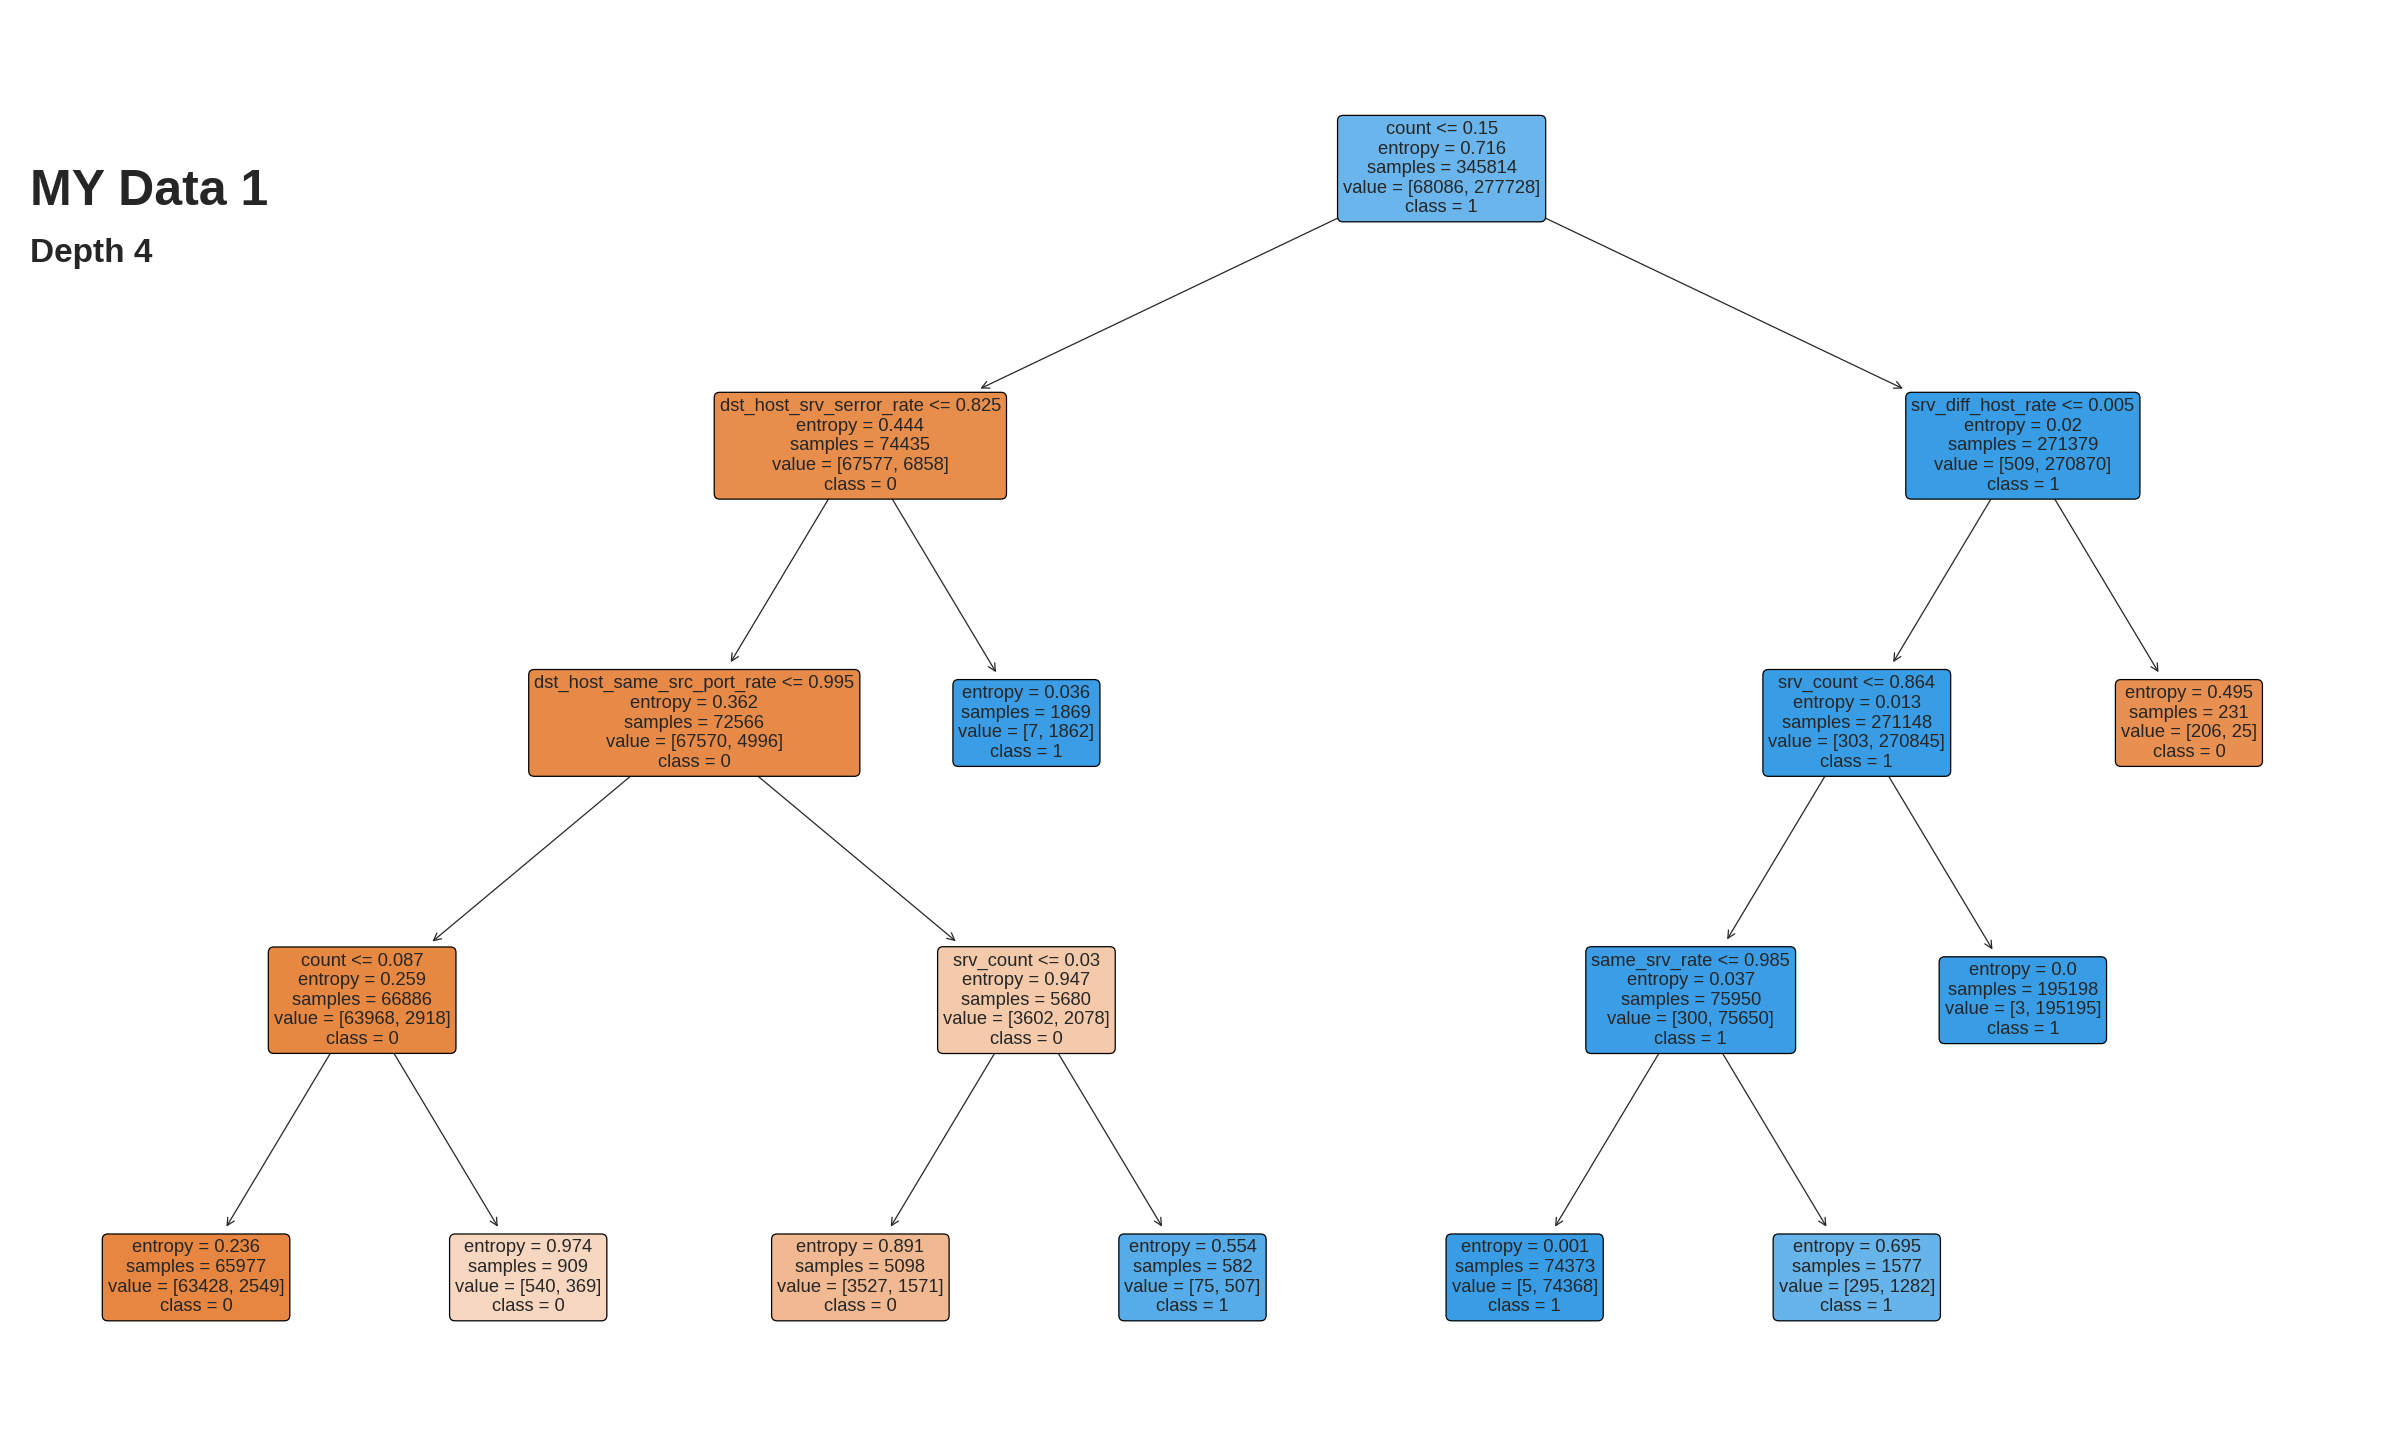

Accuracy: 98.56484511527796
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     29192
           1       1.00      0.98      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207





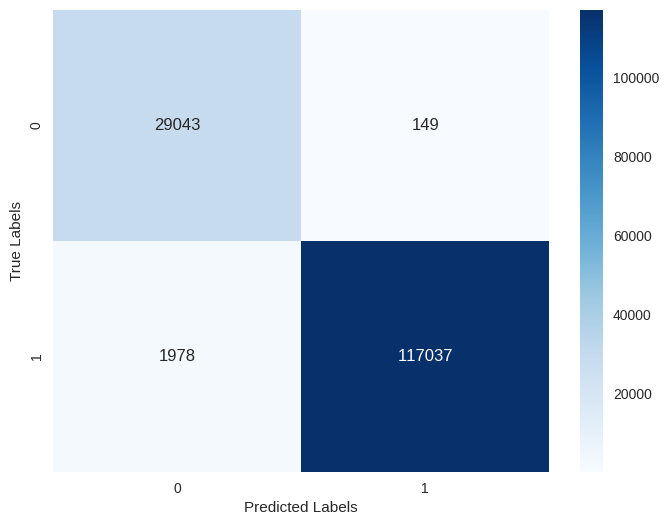

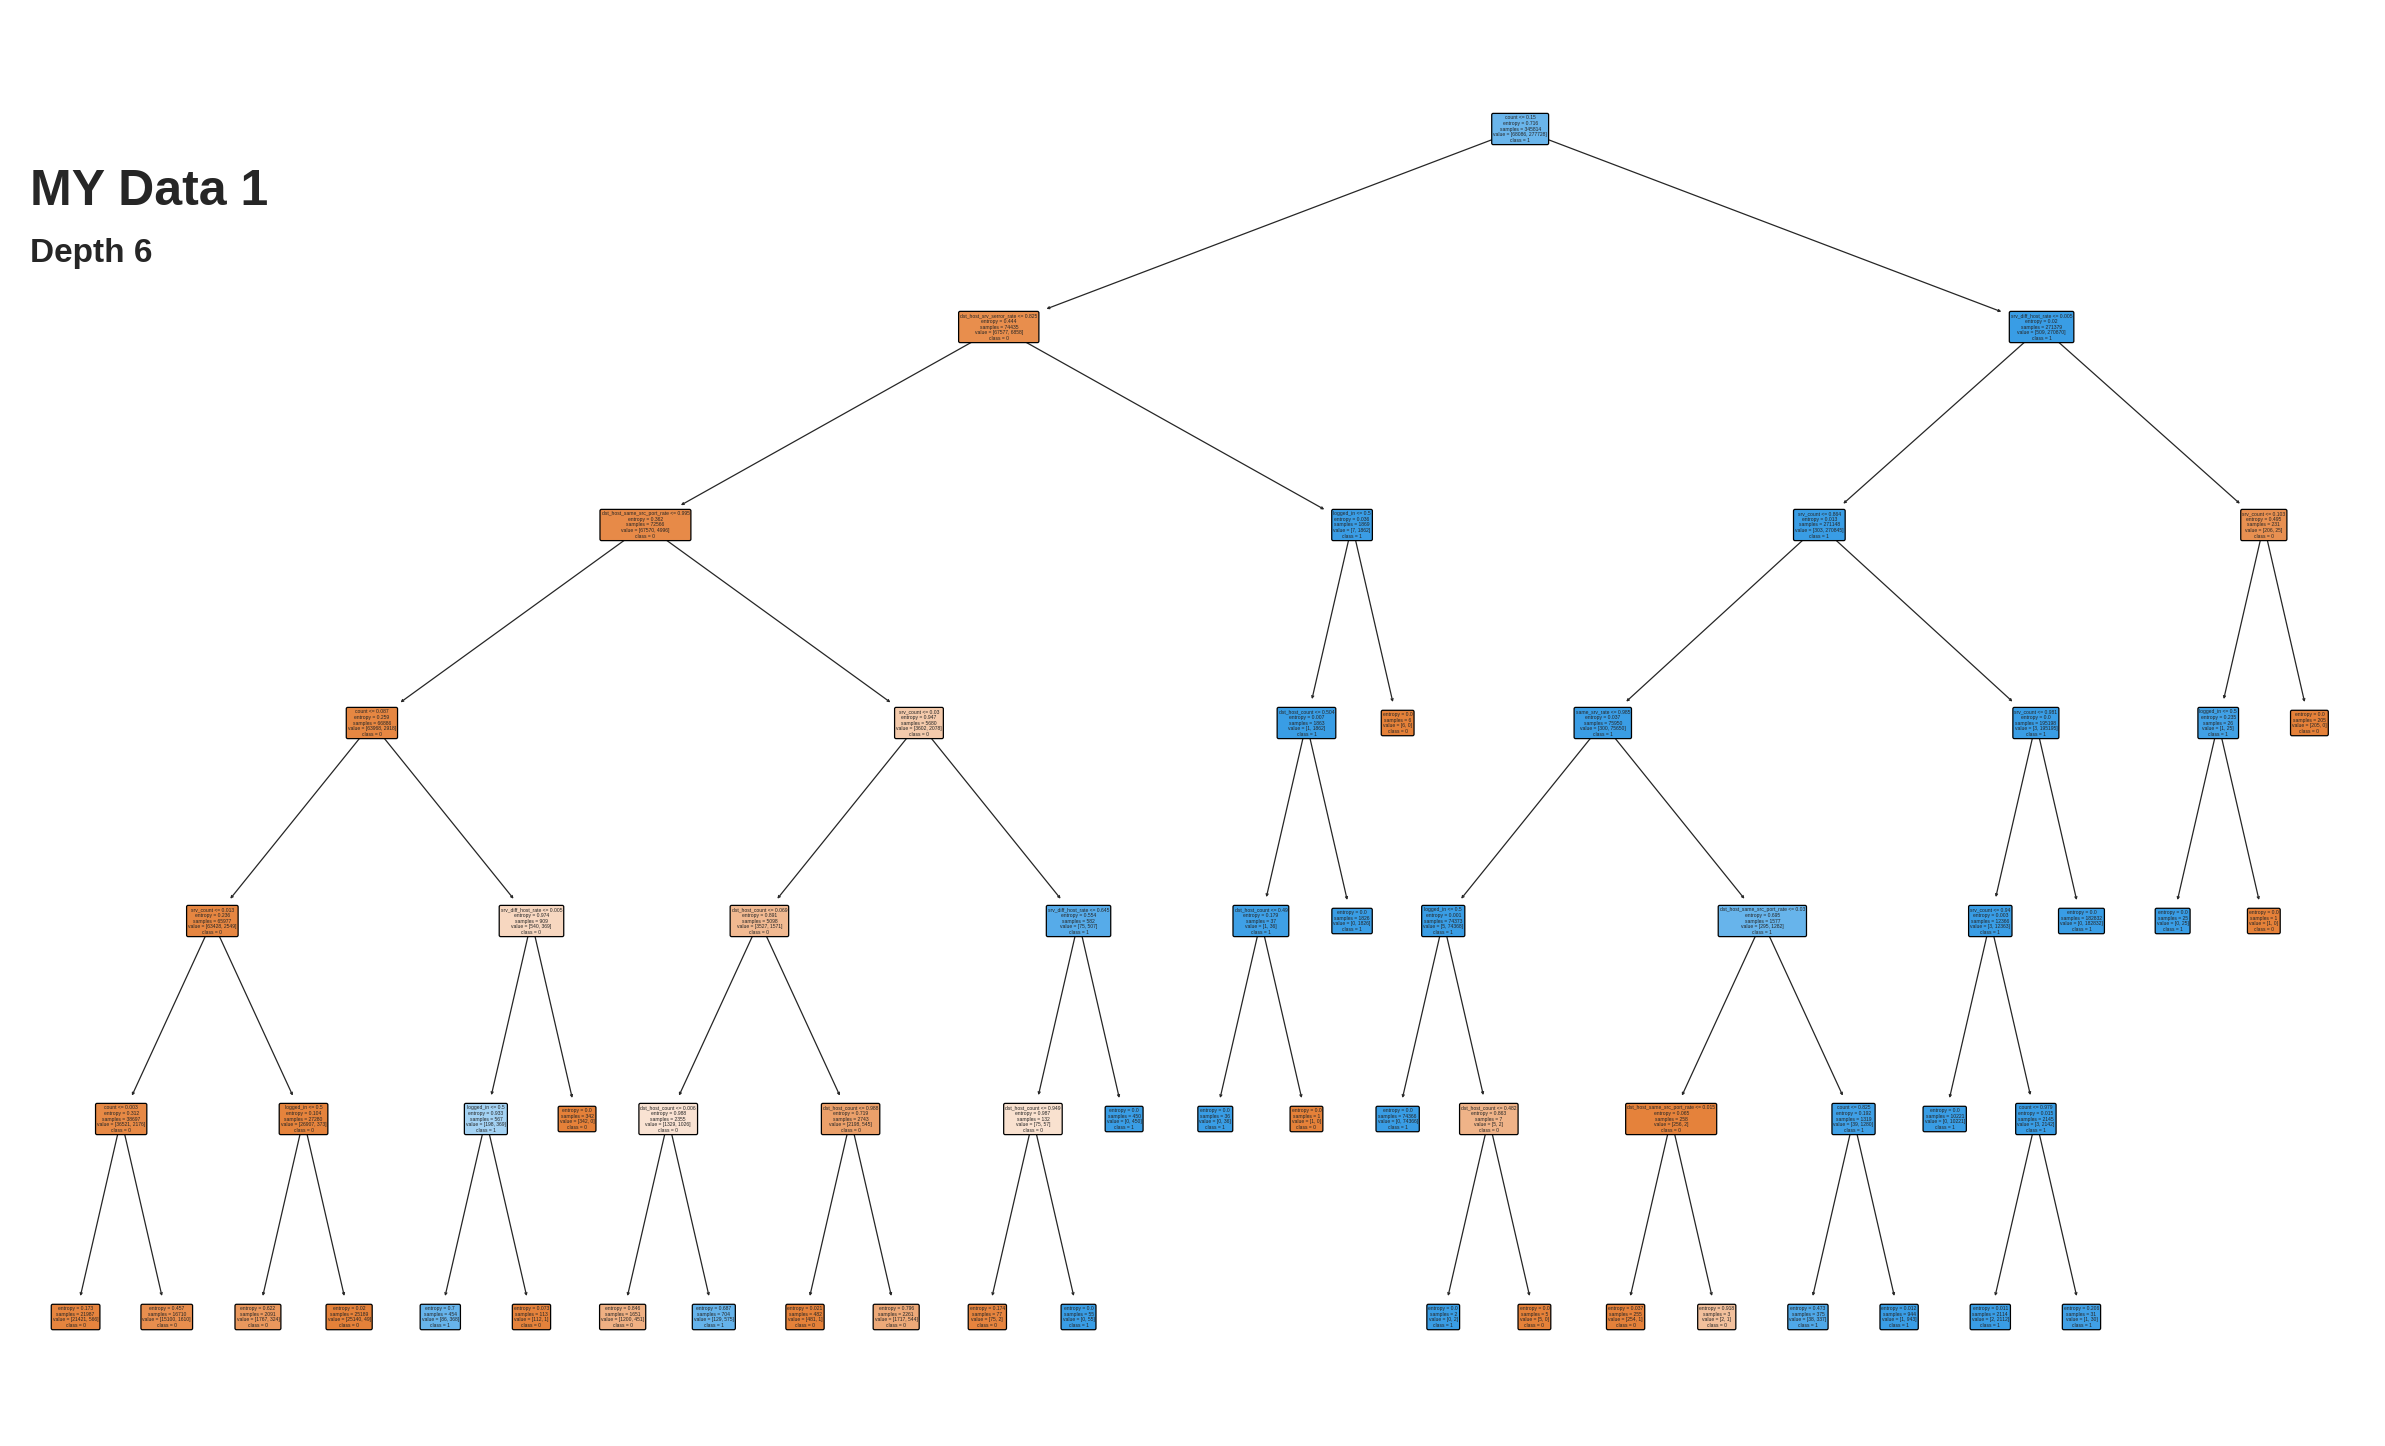

Accuracy: 98.8522809314
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207





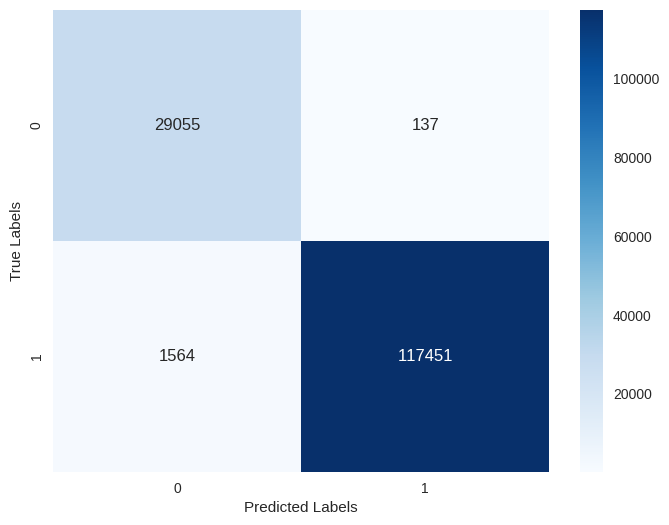

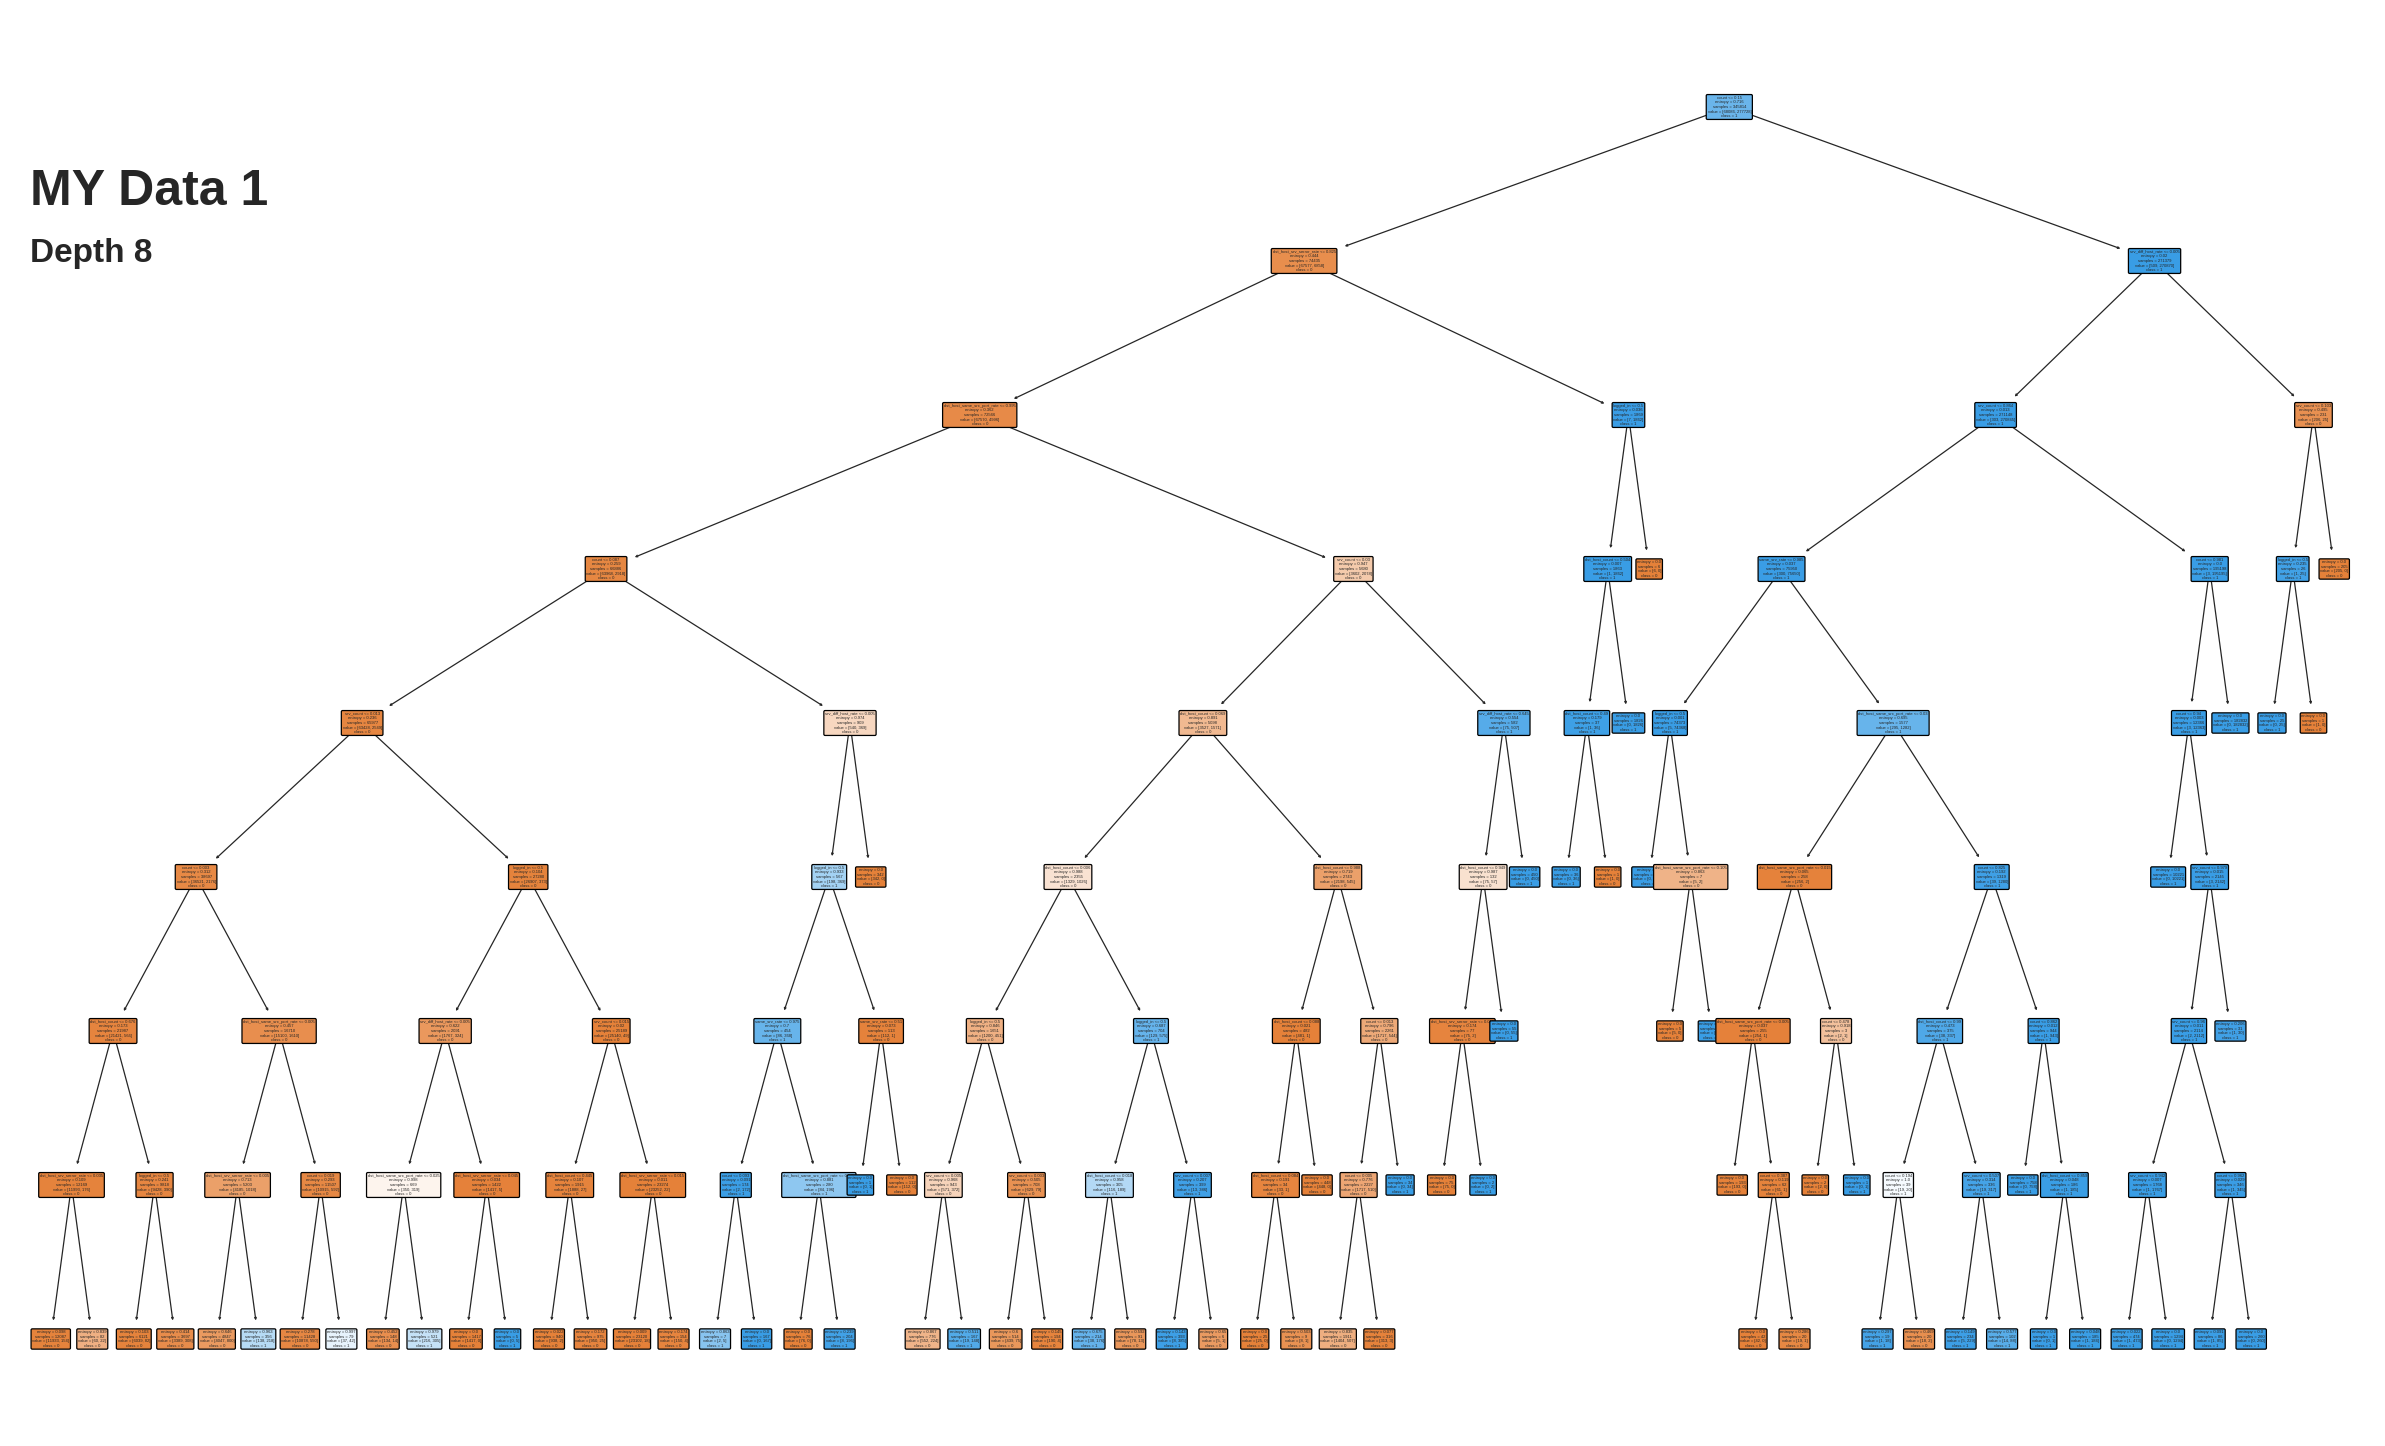

Accuracy: 99.01219240656648
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207





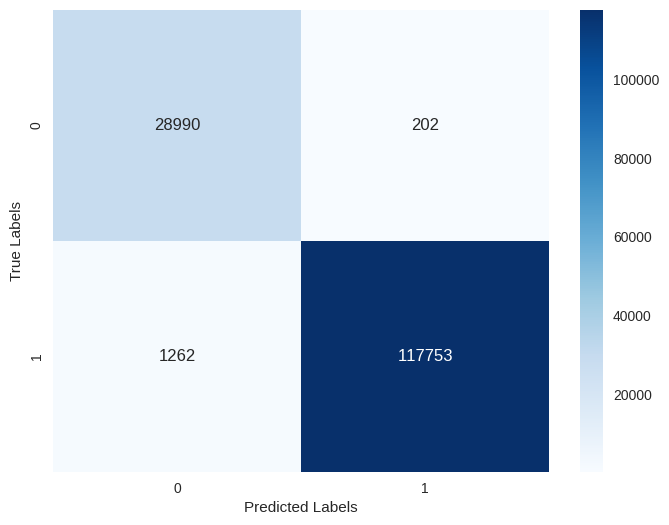

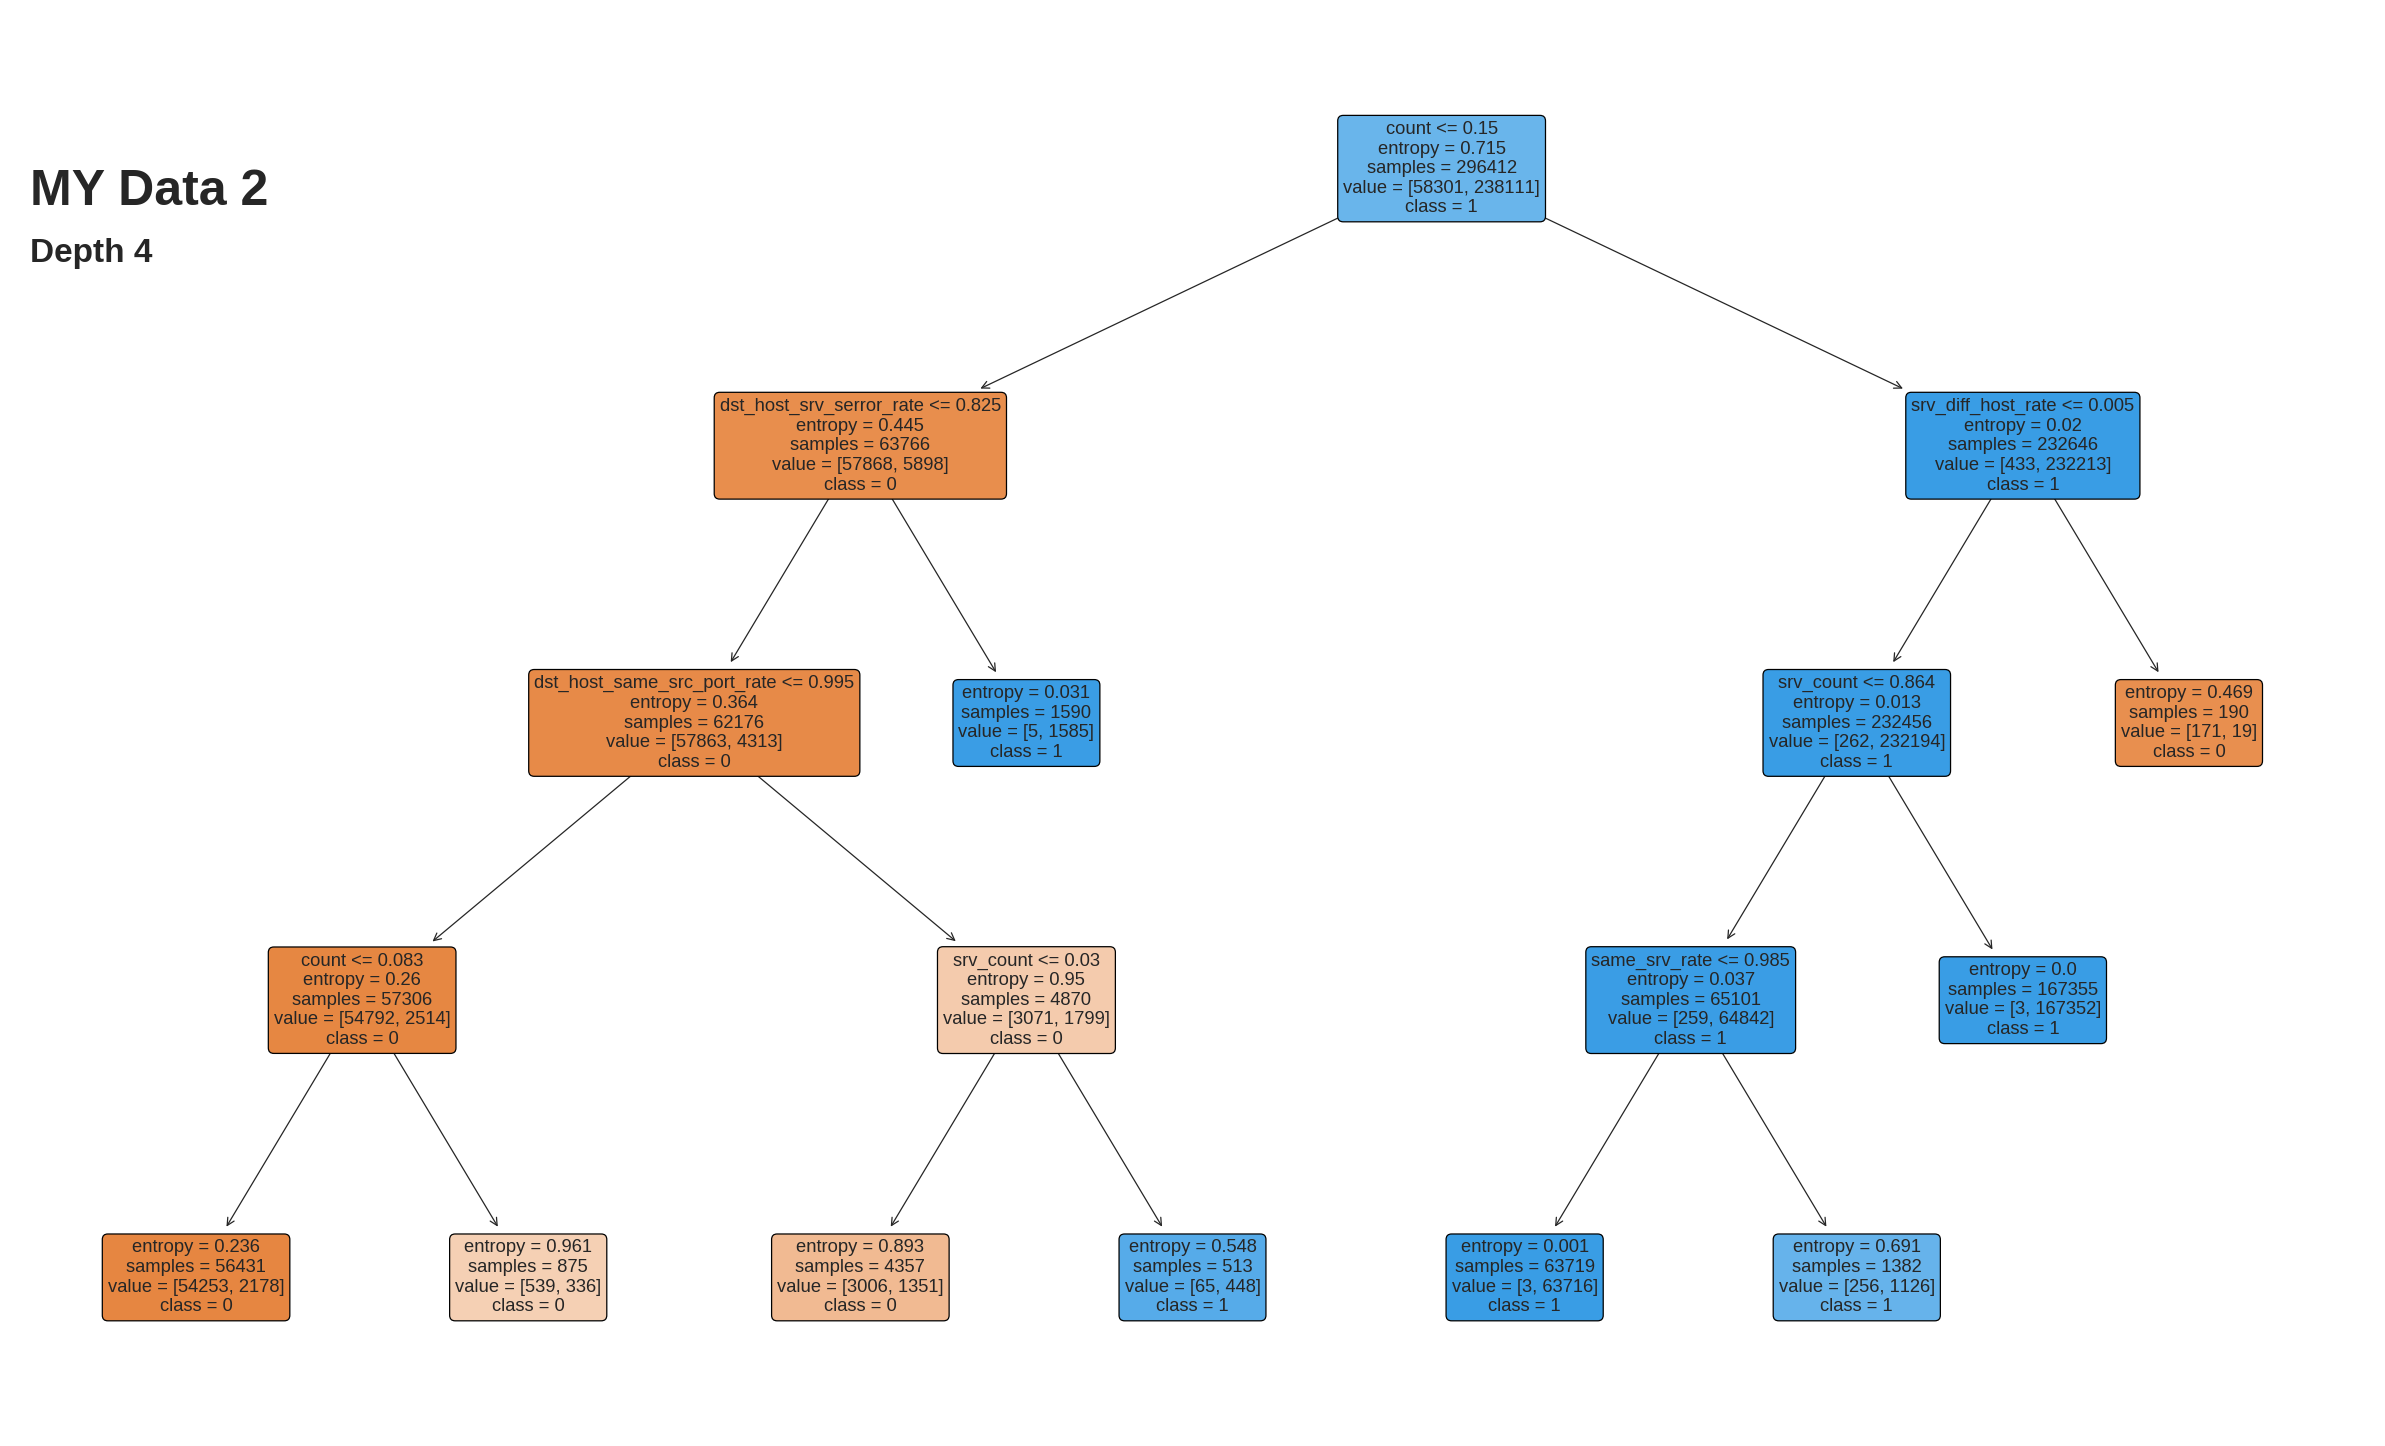

Accuracy: 98.577999989879
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     38977
           1       1.00      0.98      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609





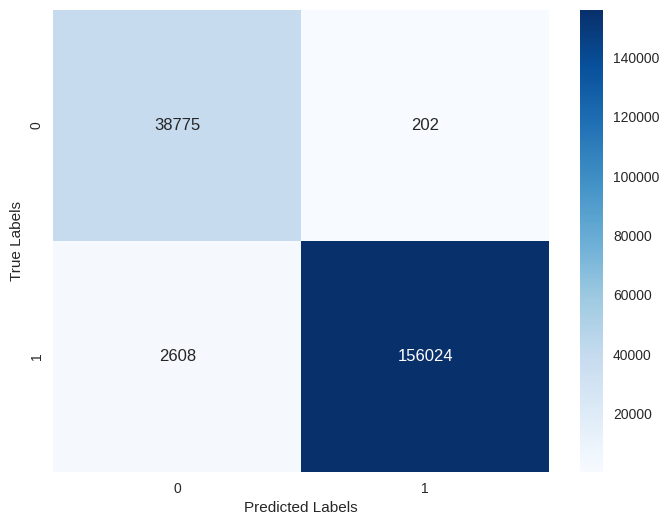

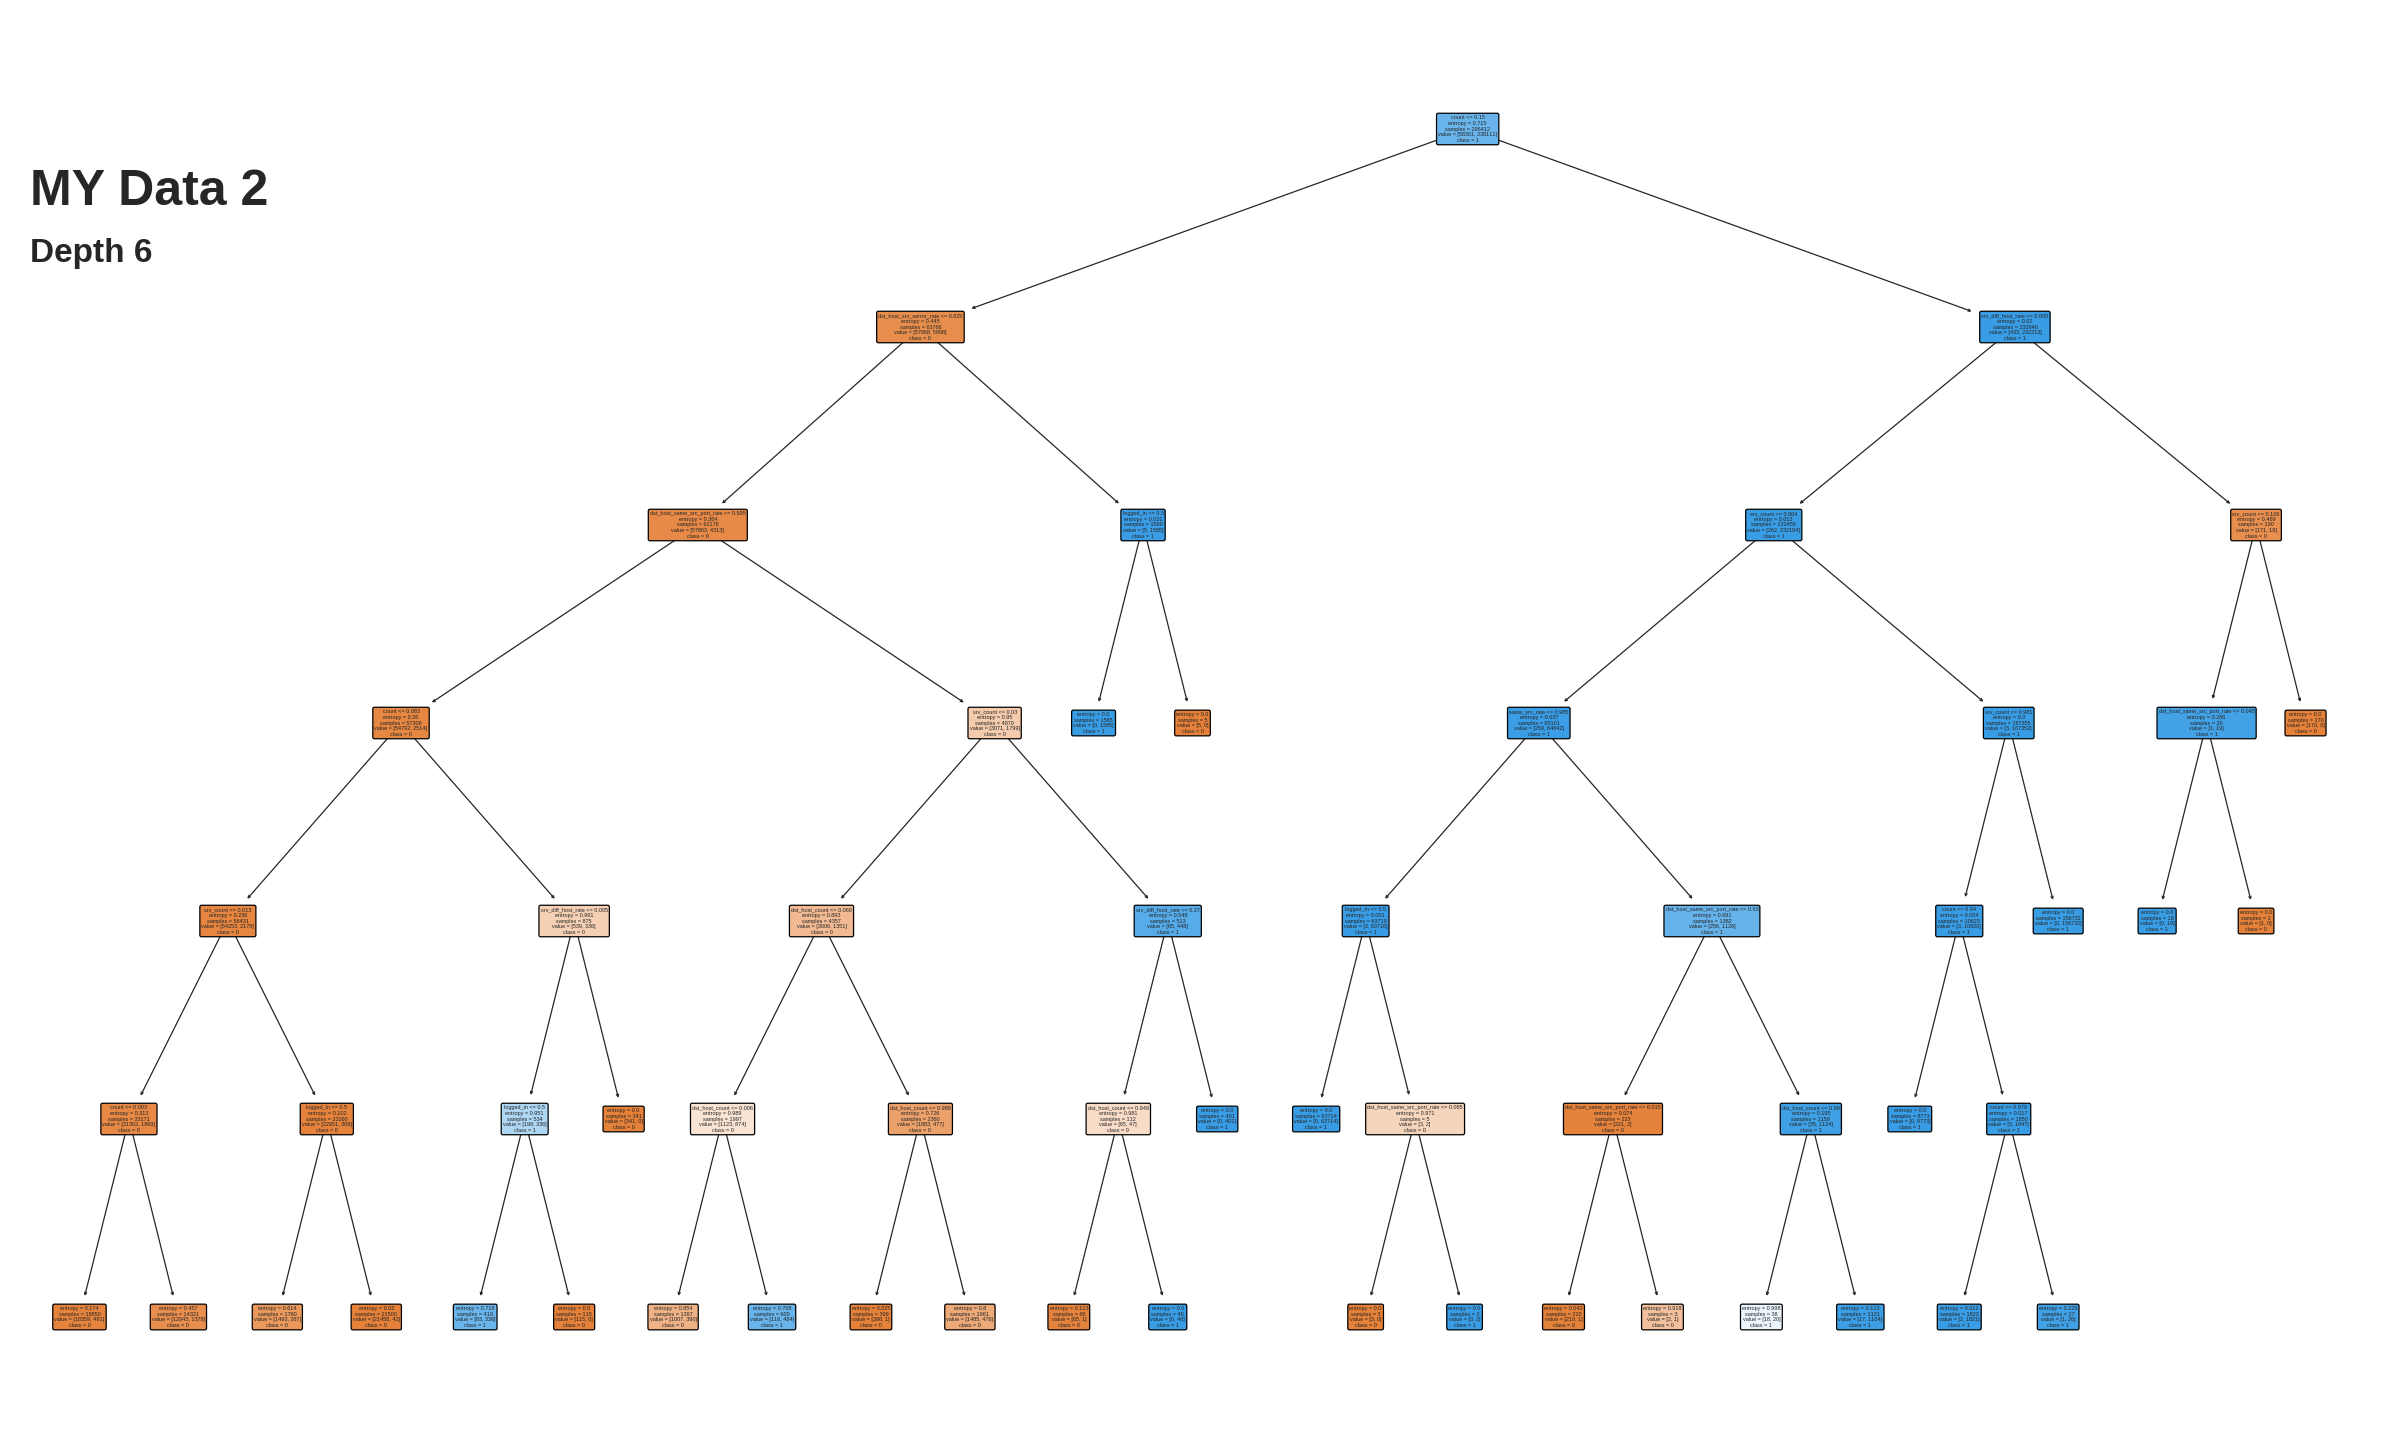

Accuracy: 98.87758148667318
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609





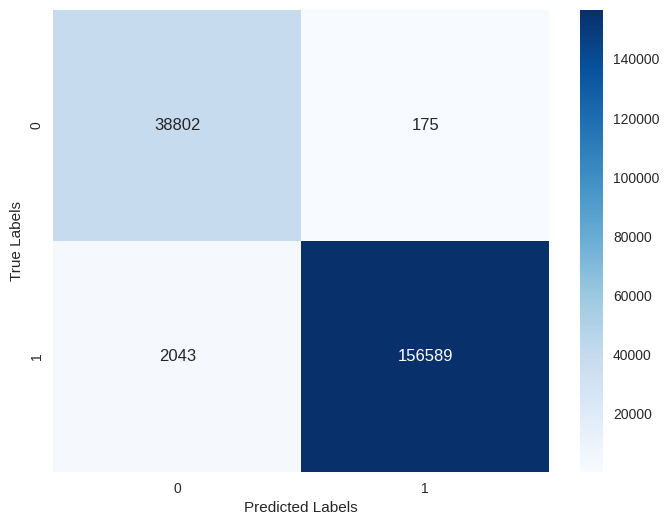

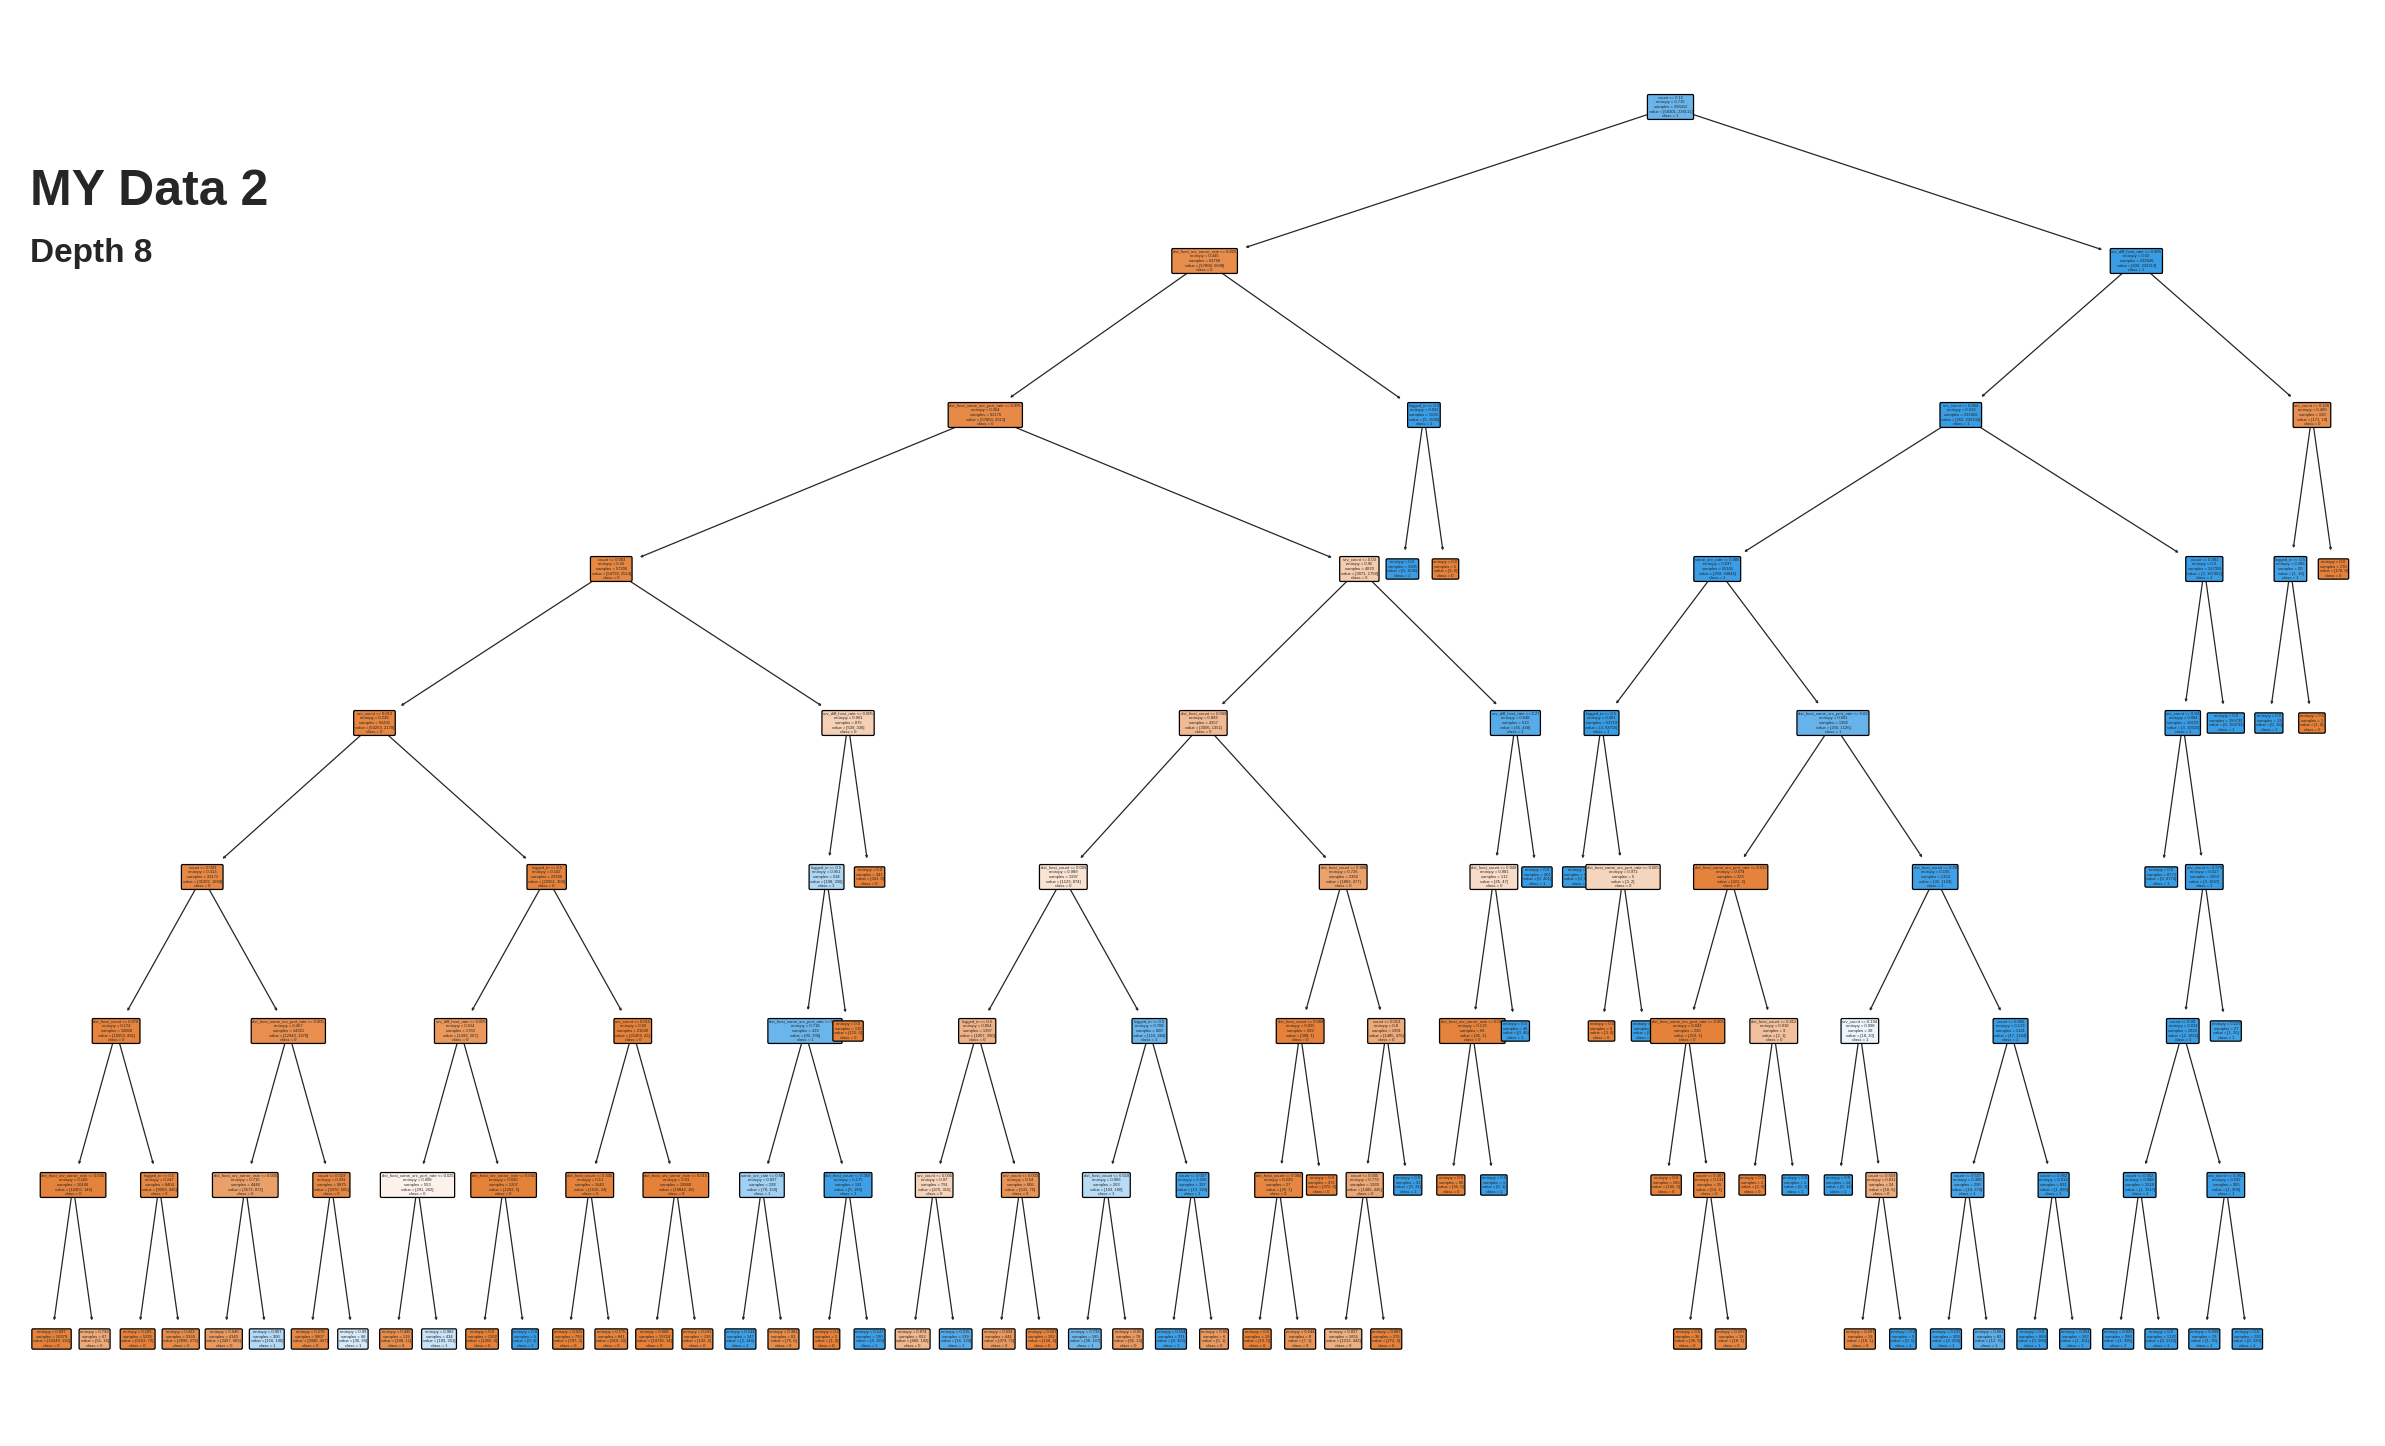

Accuracy: 99.02433593611627
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609





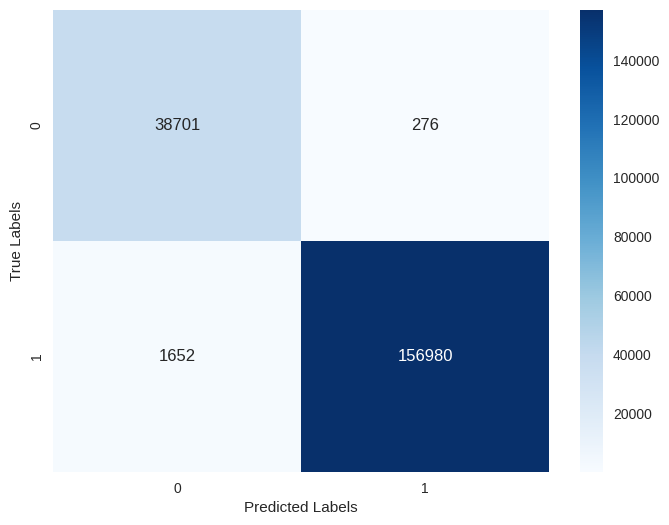

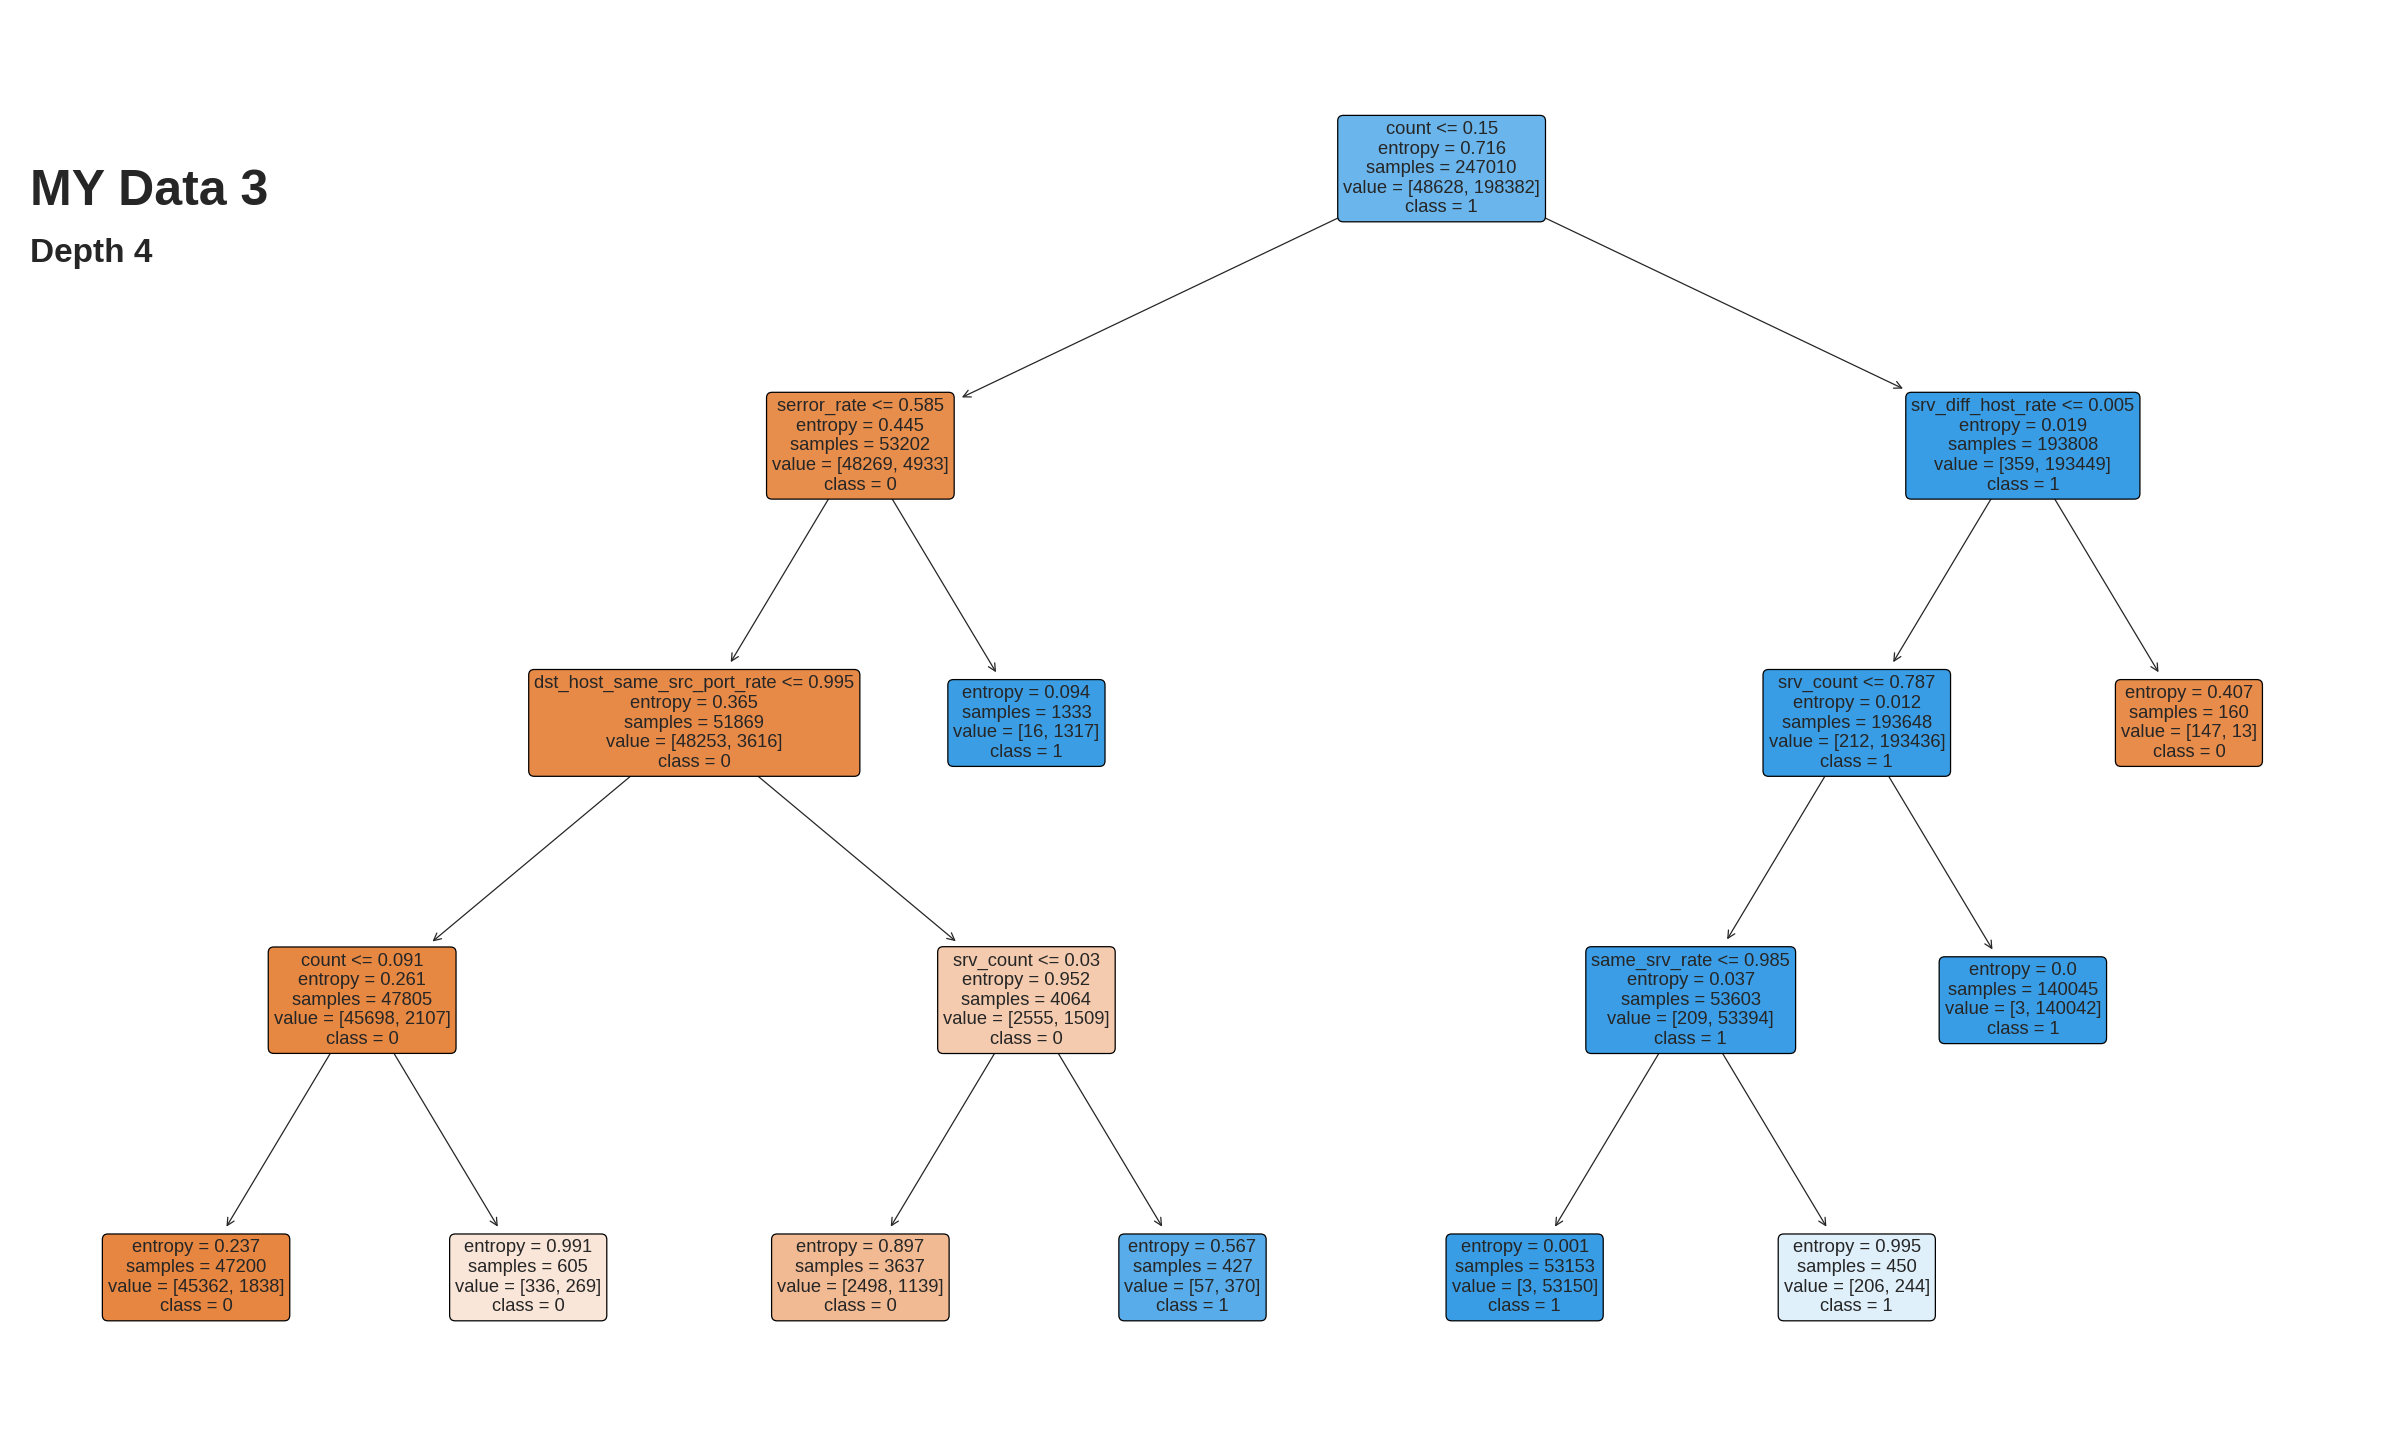

Accuracy: 98.59398974134756
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48650
           1       1.00      0.98      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011





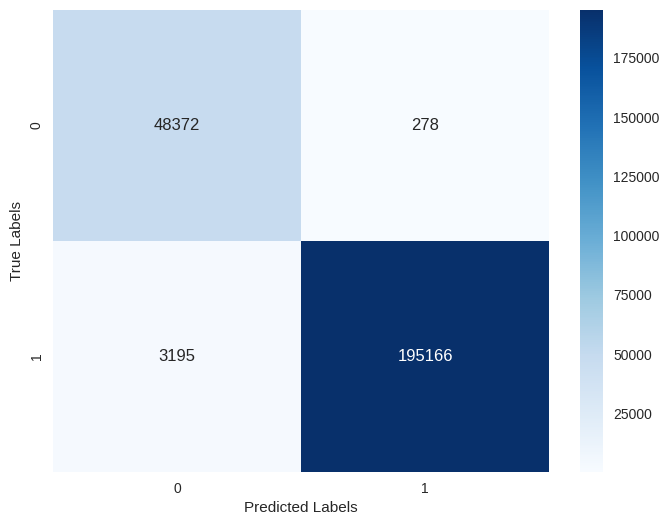

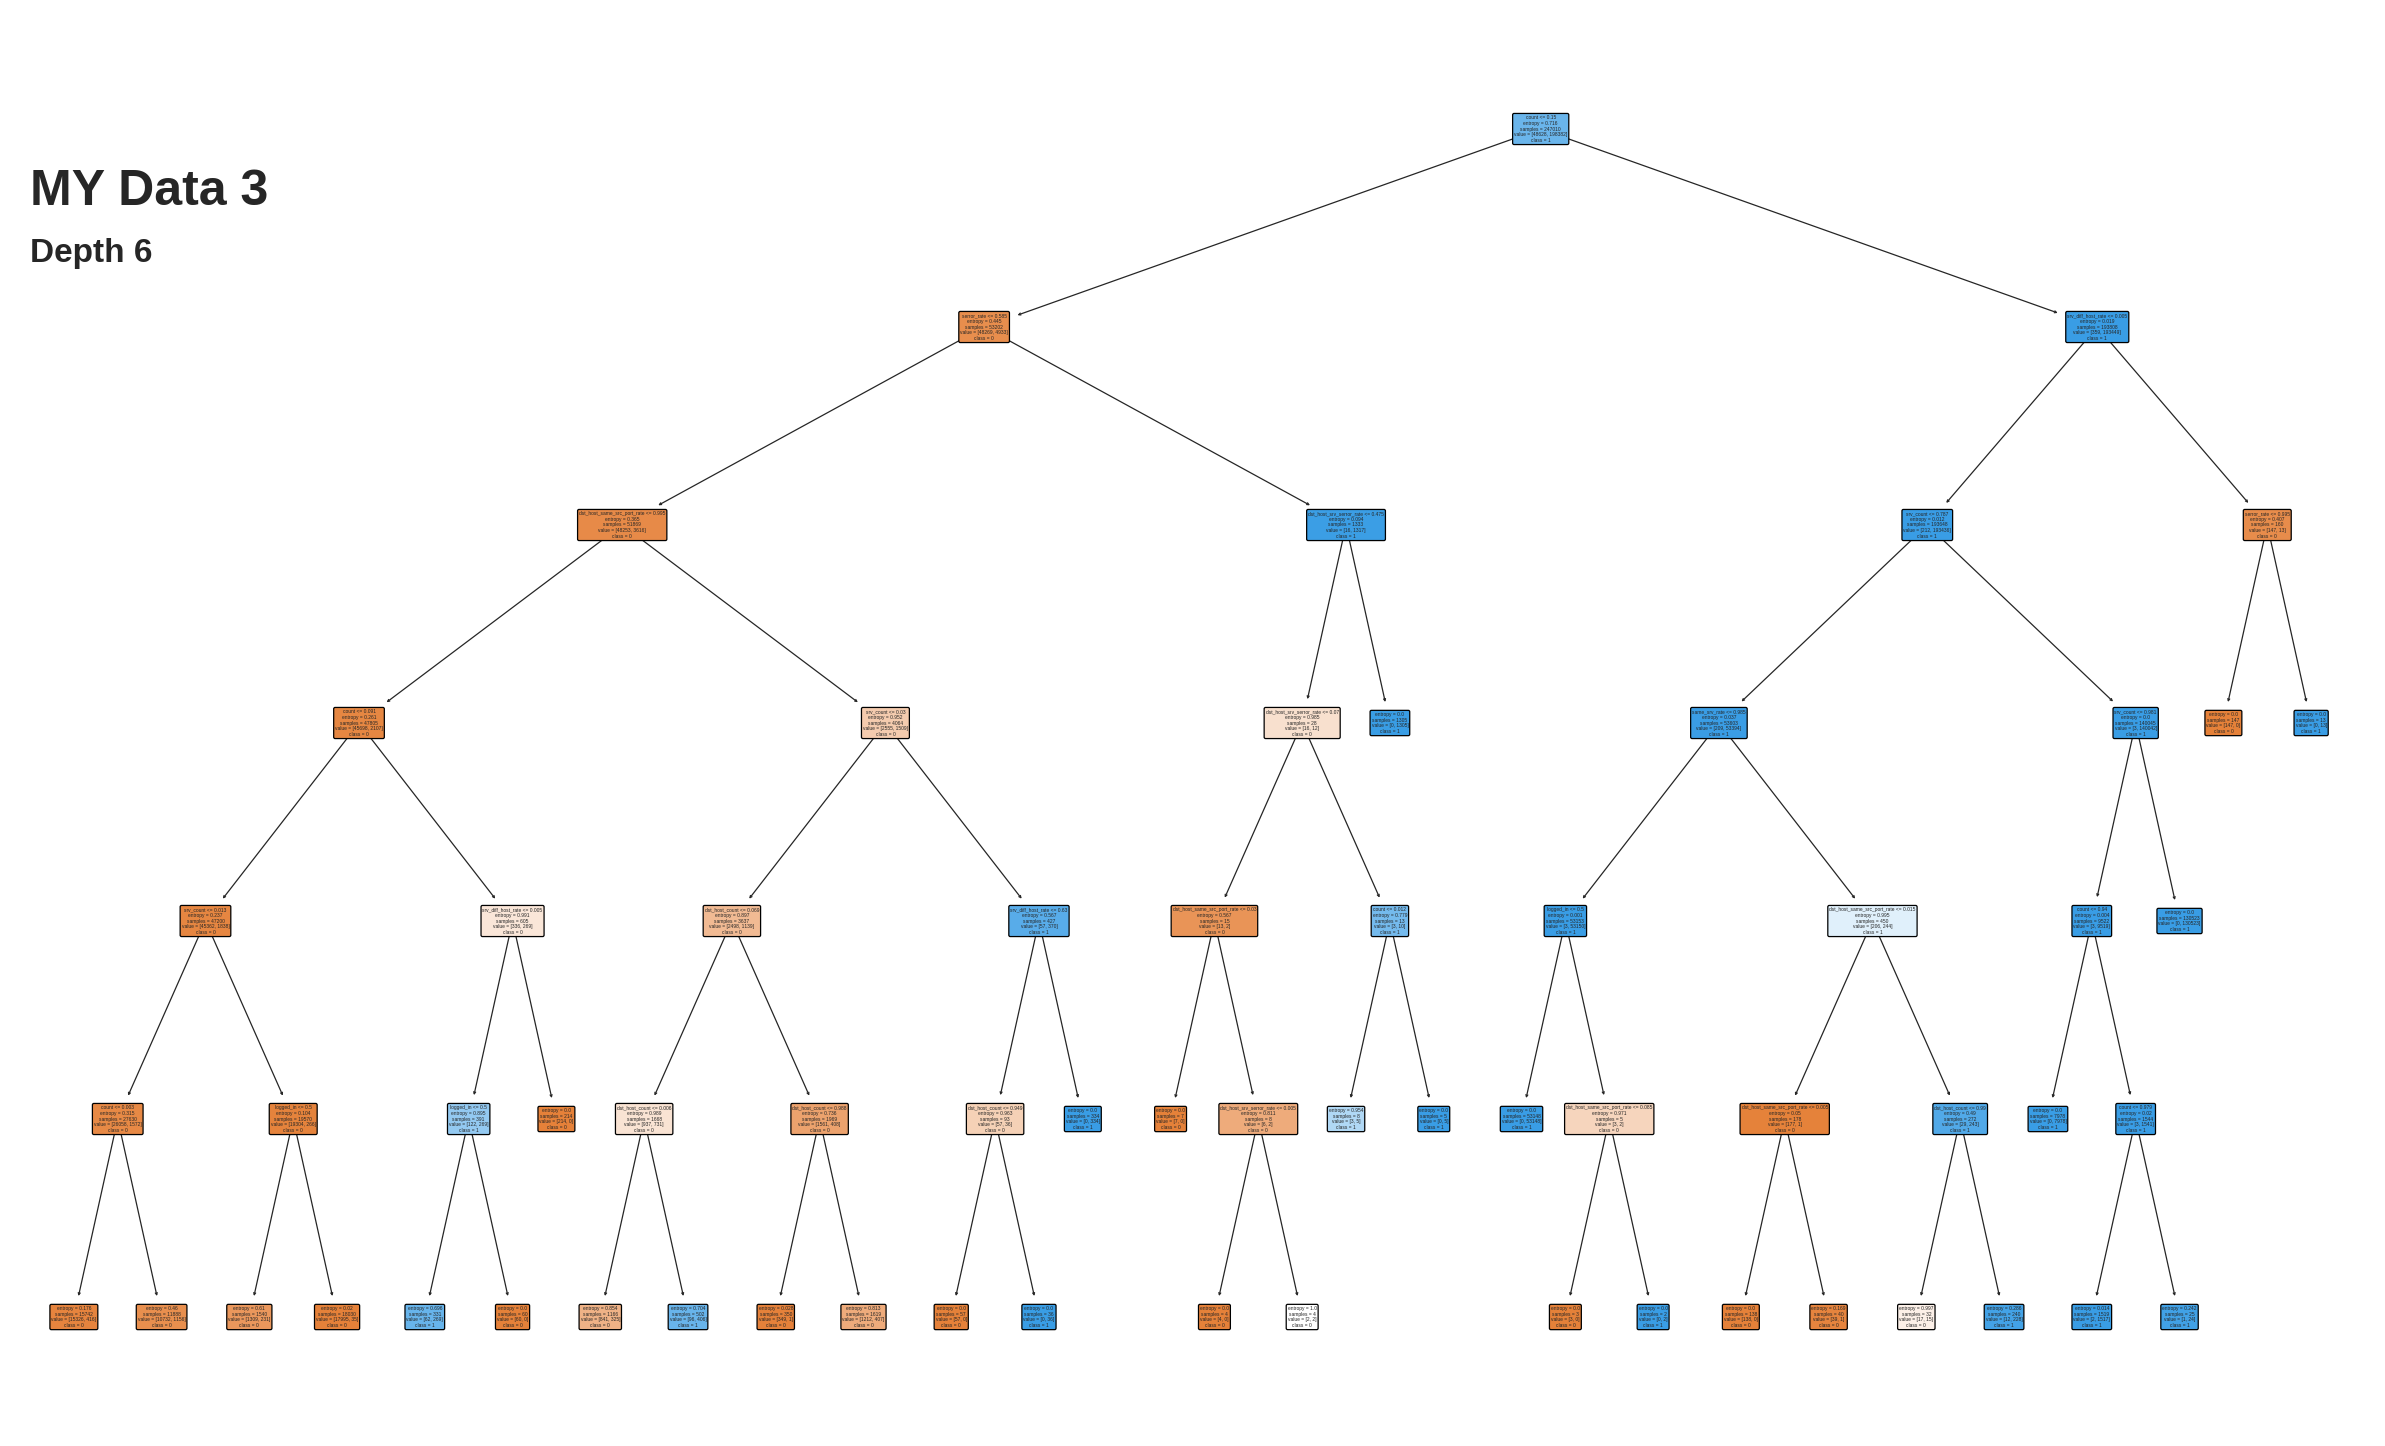

Accuracy: 98.89235702053755
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011





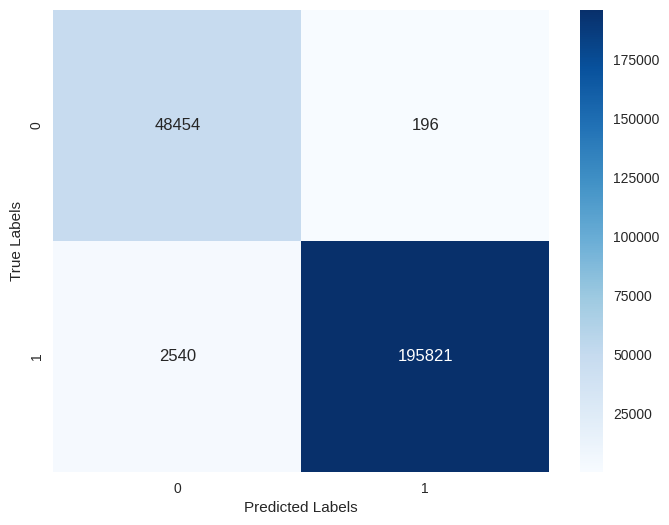

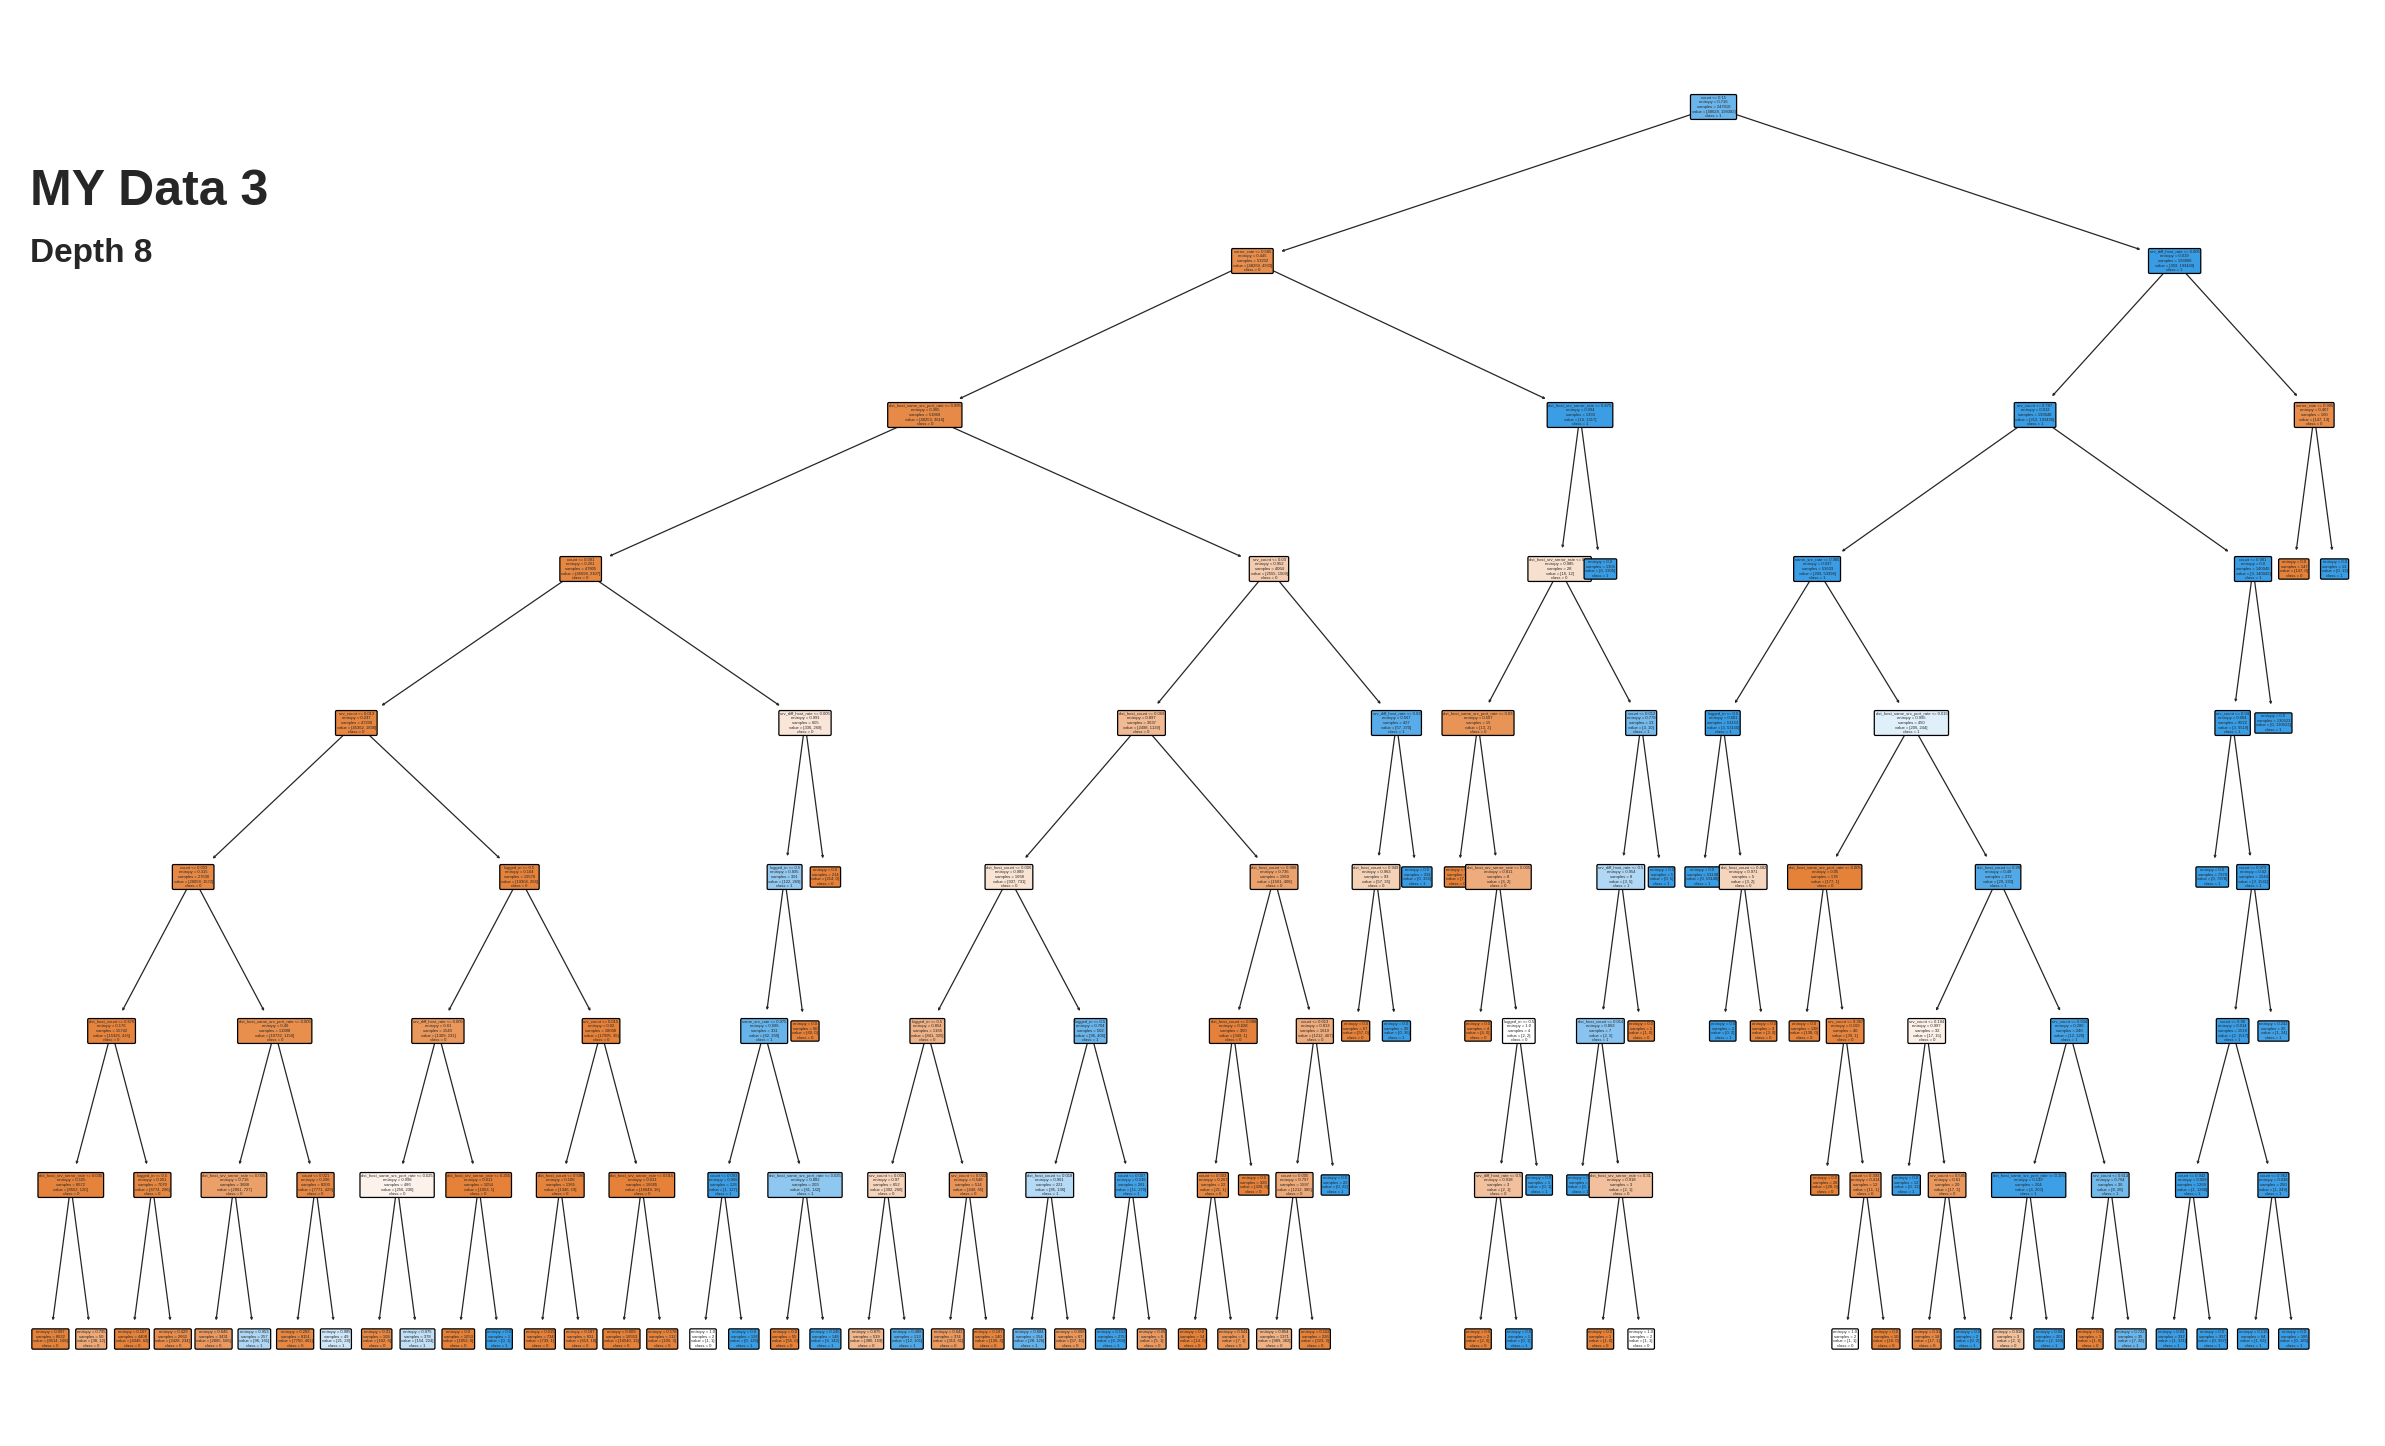

Accuracy: 99.03971887891633
Classification Report:
---------------------------

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011





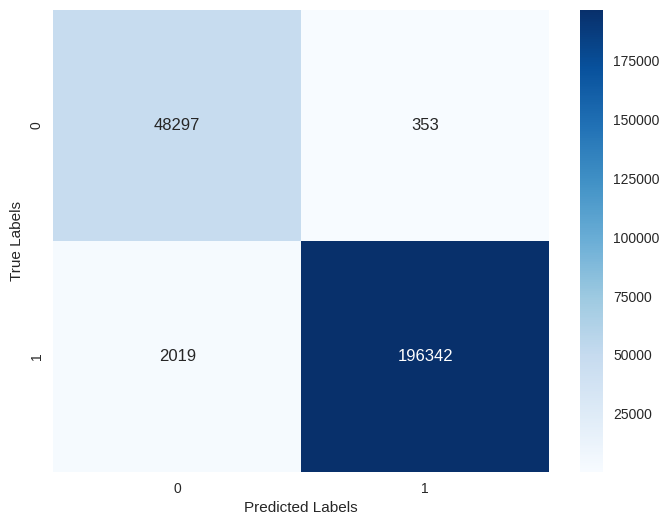

In [17]:
max_depths = [4, 6, 8]
x_trains = [X_train1, X_train2, X_train3]
y_trains = [y_train1, y_train2, y_train3]
x_tests = [X_test1, X_test2, X_test3]
y_tests = [y_test1, y_test2, y_test3]
for i in range(3):
    for depth in max_depths:
        y_pred = visualize_decision_tree(depth, x_trains[i], y_trains[i],x_tests[i],y_tests[i],i+1)
        report = classification_report(y_tests[i], y_pred)
        print("Classification Report:")
        print("---------------------------\n")
        print(report)
        cm = confusion_matrix(y_tests[i], y_pred)
        print("\n")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()
        print("\n")



## F1 score for train and test before mitigation strategies

---



In [23]:
clf = DecisionTreeClassifier(criterion='entropy' ,random_state=42)
clf.fit(X_train1, y_train1)
train_pred_before = clf.predict(X_train1)
test_pred_before = clf.predict(X_test1)

train_f1_before = f1_score(y_train1, train_pred_before)
test_f1_before = f1_score(y_test1, test_pred_before)

print (train_f1_before)
print (test_f1_before)


0.9955735177429821
0.9940742552751781


## Apply pre-prunning and display the train and test F1 scores showing

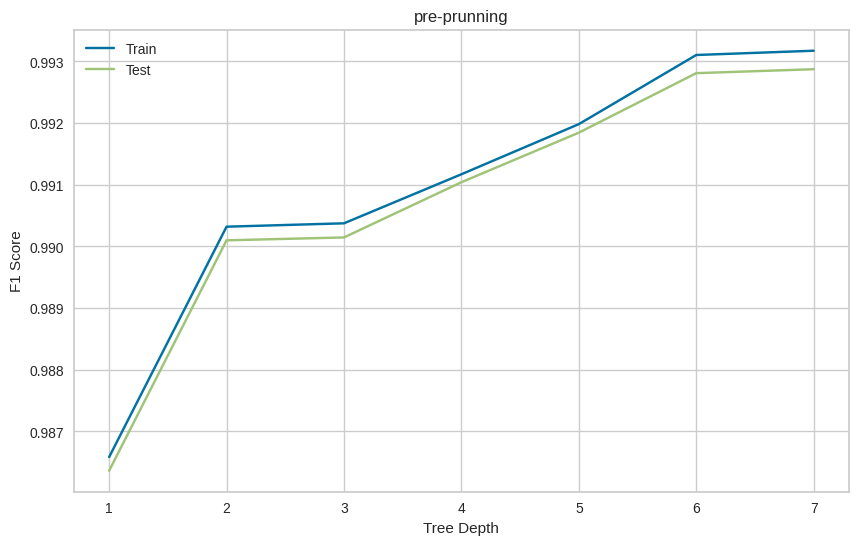

In [19]:
depth = range(1, 8)
train_scores_pre = []
test_scores_pre = []

for dep in depth:
     # Create a decision tree classifier with pre-pruning
     clf = DecisionTreeClassifier(criterion='entropy',max_depth=dep, random_state=42)
    # Fit the classifier on the training data
     clf.fit(X_train1, y_train1)
     train_pred = clf.predict(X_train1)
     test_pred = clf.predict(X_test1)

    # Compute F1 scores
     train_f1 = f1_score(y_train1, train_pred)
     test_f1 = f1_score(y_test1, test_pred)
    # Append the scores to the lists
     train_scores_pre.append(train_f1)
     test_scores_pre.append(test_f1)


# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(depth, train_scores_pre, label='Train')
plt.plot(depth, test_scores_pre, label='Test')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.title('pre-prunning')
plt.legend()
plt.show()

## Apply post-prunning and display the train and test F1 scores showing



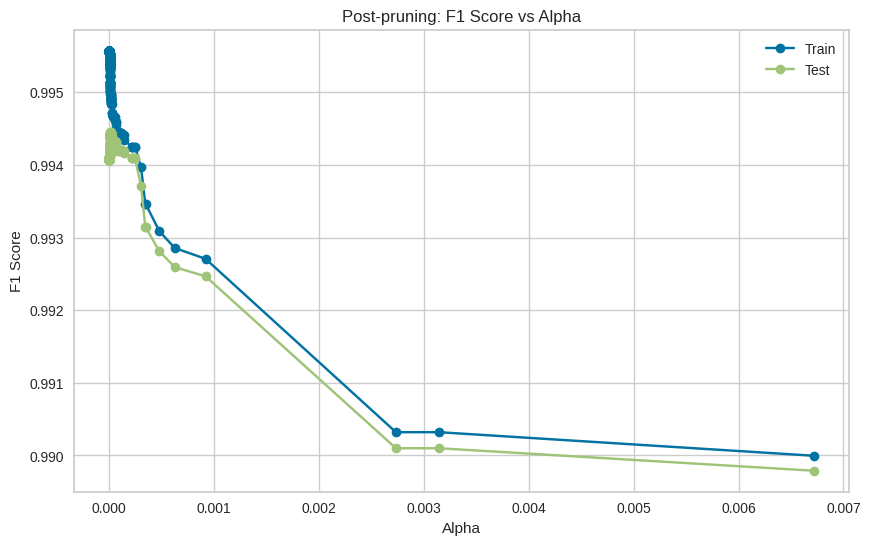

In [24]:
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train1, y_train1)

# Apply cost complexity pruning
path = clf.cost_complexity_pruning_path(X_train1, y_train1)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the maximum alpha

train_scores_post = []
test_scores_post = []
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(X_train1, y_train1)
    clfs.append(clf)
    train_pred = clf.predict(X_train1)
    test_pred = clf.predict(X_test1)

    # Compute F1 scores
    train_f1 = f1_score(y_train1, train_pred)
    test_f1 = f1_score(y_test1, test_pred)
    # Append the scores to the lists
    train_scores_post.append(train_f1)
    test_scores_post.append(test_f1)

# Plot the test and train accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores_post, marker='o', label='Train')
plt.plot(ccp_alphas, test_scores_post, marker='o', label='Test')
plt.xlabel("Alpha")
plt.ylabel("F1 Score")
plt.title("Post-pruning: F1 Score vs Alpha")
plt.legend()
plt.show()



## Apply k-foldcross validation and display the train and test F1 scores showing


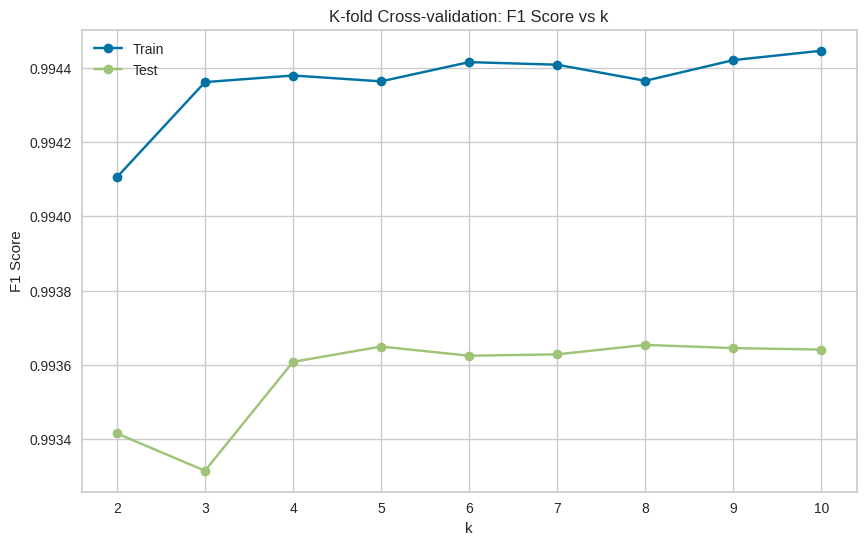

In [25]:
clf = DecisionTreeClassifier(random_state=42)
k_values = range(2, 11)
mean_train_scores = []
mean_test_scores = []

for k in k_values:
    train_scores = cross_val_score(clf, X_train1, y_train1, cv=k, scoring='f1')
    test_scores = cross_val_score(clf, X_test1, y_test1, cv=k, scoring='f1')
    mean_train_scores.append(np.mean(train_scores))
    mean_test_scores.append(np.mean(test_scores))

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, marker='o', label='Train')
plt.plot(k_values, mean_test_scores, marker='o', label='Test')
plt.xlabel("k")
plt.ylabel("F1 Score")
plt.title("K-fold Cross-validation: F1 Score vs k")
plt.legend()
plt.show()


## Display the F1 scores for the training and testing data, showing improvement

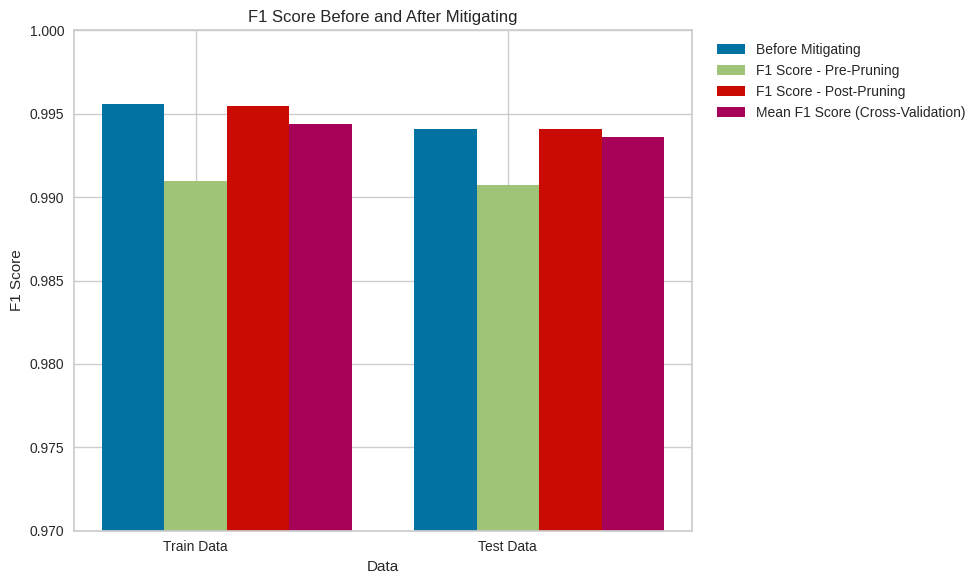

In [26]:

f1_scores_before = [train_f1_before, test_f1_before]
f1_scores_after_pre = [np.mean(train_scores_pre), np.mean(test_scores_pre)]
f1_scores_after_post = [np.mean(train_scores_post), np.mean(test_scores_post)]
mcvf = [np.mean(mean_train_scores), np.mean(mean_test_scores)]

labels = ['Train Data', 'Test Data']

x = range(len(labels))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, f1_scores_before, width, label='Before Mitigating')
ax.bar([val + width for val in x], f1_scores_after_pre, width, label='F1 Score - Pre-Pruning')
ax.bar([val + width * 2 for val in x], f1_scores_after_post, width, label='F1 Score - Post-Pruning')
ax.bar([val + width * 3 for val in x], mcvf, width, label='Mean F1 Score (Cross-Validation)')

ax.set_ylim(0.97, 1)


ax.set_ylabel('F1 Score')
ax.set_xlabel('Data')
ax.set_title('F1 Score Before and After Mitigating')
ax.set_xticks([val + width for val in x])
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()